<h1><center><code style="background:darkblue;
    color:white;
    font-family:Arial;
    font-size: 70px">SICSS Amsterdam 2024</code></center></h1>
    
<center> <code style="background:white;
    color:darkblue;
    font-family:Arial;
    font-size: 50px">Workshop Network Analysis</code></center>
    
<center> <code style="background:white;
    color:#0570b0;
    font-family:Arial;
    font-size: 25px">dr. R. M. (Rafiazka) Hilman</br>University of Amsterdam</code></center>

<center><div class="container">
  <img src="graph.png" alt="Snow" style="width:60%;"> </center></div>

<right> <code style="background:white;
    color:black;
    font-family:Arial;
    font-size: 12px">Source: Grandjean (2014)</code></right>

# What is Network Analysis?

**Elements:** 
- Nodes: actor/object
- Edges: relation/connection

**Relational format:** 
- Adjacency Matrix
- Edgelist

**Scopes:** 
- Structure: centrality, tie trength, robustness, etc
- Dynamics: emergence, difussion, growth, etc

**Types:**

- <left> <font color='maroon'>**Undirected vs Directed Network**</font> </left> 

- <LEFT> <font color='purple'>**Unweighted vs Weighted Network**</font> </left> 

- <right> <font color='darkorange'>**Static vs Temporal Network**</font> </right> 

- <left> <font color='magenta'>**Complete vs Sparse Network**</font> </left> 

**Visualizations:**

<div class="flex">
  <img id="animated-gif" src="d05.gif" alt="school cluster 2" style="width:100% loop="infinite" />
</div>

<div class="flex">
  <img id="animated-gif" src="clust.gif" alt="school cluster 1" style="width:100% loop="infinite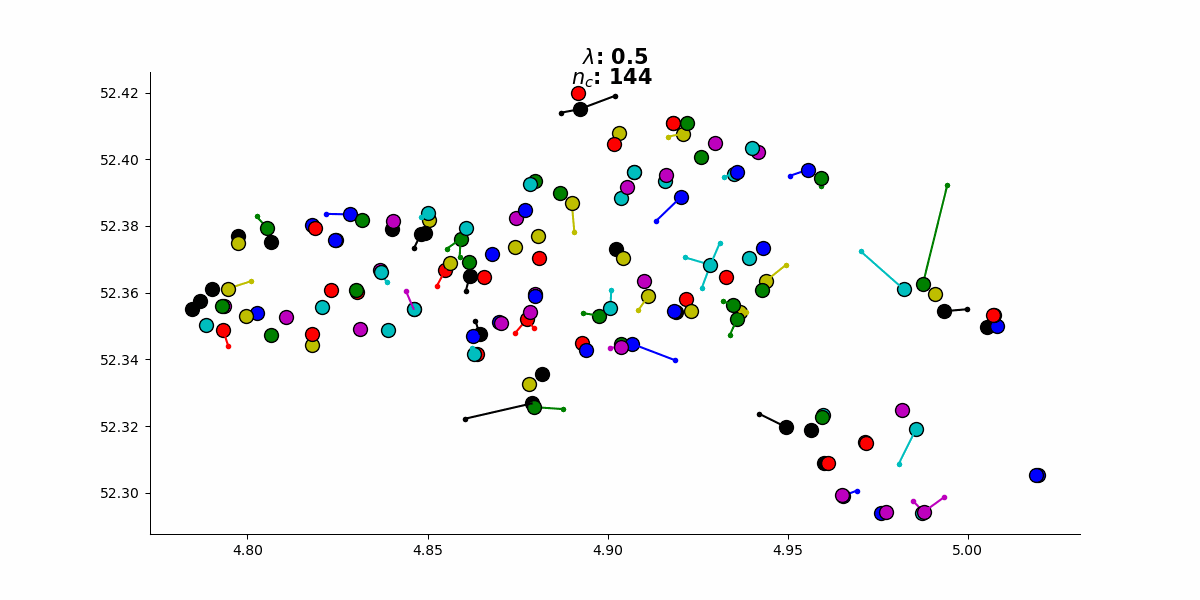" />
</div>

# Voting Behavior on Social Issues in the Dutch Parliament

The dynamics of parliamentary voting starts its significant development in the literature of political science after the prominant work of Poole and Rosenthal (1985). There are couple of observations that could be the interest of our analysis, such as voting behaviour, government-opposition relations and voting discipline. 

We will analyze the voting behavior data in the Dutch Lower House under the premiership of Wim Kok from PvdA (Labor Party) along with D66 (centrum-liberal) and VVD (right-liberal) in the coallition government. He succeed two cabinets namely Kabinet Paars/Kok I-II from 22 August 1994 to 22 July 2002. For this purpose, we take into account the period after the General Election 1994 and before General election 2002. The issue covered in the dataset is related to social security. 

<center><div class="container">
  <img src="Tweede_Kamerverkiezingen_1994.png" alt="Snow" style="width:30%;"> 
    <img src="Tweede_Kamerverkiezingen_1998.png" alt="Snow" style="width:30%;"> 
    </center></div>

<div class="alert alert-info"><code 
    style="background:none;
    font-family:Arial;
    font-size: 25px">Outline</code></left>
</div>

- **Packages** 
- **Dataset** 
- **Network Transformation**
- **Network Visualization** 
- **Measures at the Network Level** 
- **Measures at the Group Level** 
- **Measures at the Node Level** 

<div class="alert alert-info"><code 
    style="background:none;
    font-family:Arial;
    font-size: 25px">Packages</code></left>
</div>

In [11]:
import pandas as pd
import numpy as np
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
from matplotlib.lines import Line2D
import seaborn as sns
import collections
import itertools

In [12]:
plt.rcParams["font.family"] = "serif"

In [13]:
pwd

'/Users/rafiazkahilman/Documents/Workshop/SICSS 2024/network'

<div class="alert alert-info"><code 
    style="background:none;
    font-family:Arial;
    font-size: 25px">Dataset</code></left>
</div>

In this session, we will work on the voting records in social security issues as specifically pre-curated for our case study purpose. 

In [14]:
SocialSecurity = pd.read_csv('/Users/rafiazkahilman/Documents/Workshop/SICSS 2024/network/data/SocialSecurity.csv').drop('Unnamed: 0', axis=1)
SocialSecurity.head(1)

id        date  \
0  19961126-h-tk-19961997-2465-2465-1-26070089  1996-11-26   

             sponsorName  sponsorNumber proposaltype   result sponsorParty  \
0  Eimert van Middelkoop              3       Motion  adopted          GPV   

  ideology_sponsor  state_market_sponsor  left_right_sponsor  \
0     Conservative                   5.8              8.1444   

   liberty_authority_sponsor supportParty ideology_support  \
0                     8.6364          AOV    Special issue   

   state_market_support  liberty_authority_support  left_right_support  
0                   NaN                        NaN                 NaN

In [15]:
list(SocialSecurity.columns)

['id',
 'date',
 'sponsorName',
 'sponsorNumber',
 'proposaltype',
 'result',
 'sponsorParty',
 'ideology_sponsor',
 'state_market_sponsor',
 'left_right_sponsor',
 'liberty_authority_sponsor',
 'supportParty',
 'ideology_support',
 'state_market_support',
 'liberty_authority_support',
 'left_right_support']

<div class="alert alert-info"><code 
    style="background:none;
    font-family:Arial;
    font-size: 25px">Network Transformation</code></left>
</div>

In order to initialize the network, we need to have edgelist and nodelist ready. 

The edgelist contains "suppportParty" as **source** node and "sponsorParty" as **target** node. 
- out edge: party gives support to proposed bill
- in edge: party receives proposal to be voted

#### Edgelist

In [16]:
edgelist = SocialSecurity[['id', 'supportParty', 'sponsorParty']]
edgelist = pd.DataFrame(edgelist.groupby(['supportParty', 'sponsorParty'])['id'].nunique()).reset_index()
edgelist.columns = ['supportParty', 'sponsorParty', 'freq']
edgelist.head(3)

supportParty sponsorParty  freq
0          AOV          AOV    14
1          AOV          CDA    58
2          AOV          D66    75

The edge weight is the frequency of such relationship occurs. If the value in column "supportParty" is the same as the value in column "sponsorParty", it indicates the internal party support as the member of parliament most likely will support the legislation/issue raised by their own party (self-loops). 

#### Nodelist 

In [17]:
nodelist = pd.read_csv('/Users/rafiazkahilman/Documents/Workshop/SICSS 2024/network/data/SocialSecurity_node.csv').drop('Unnamed: 0', axis=1)
nodelist.head(1)

party  parlgov_party_id country_name_short country_name party_name_short  \
0  50PLUS            2109.0                NLD  Netherlands              50+   

  party_name_english party_name party_name_ascii family_name_short  \
0             50PLUS     50PLUS           50PLUS               lib   

  family_name  ...  cmp  euprofiler  ees  castles_mair  huber_inglehart  ray  \
0     Liberal  ...  NaN         NaN  NaN           NaN              NaN  NaN   

   benoit_laver  chess  country_id  family_id  
0           NaN    NaN         8.0        6.0  

[1 rows x 24 columns]

We should refine the nodelist by keeping only the nodes that exist in the edgelist. 

In [18]:
nodelist['family_name'].unique()

array(['Liberal', nan, 'Special issue', 'Christian democracy', 'Agrarian',
       'Right-wing', 'Communist/Socialist', 'Conservative',
       'Green/Ecologist', 'Social democracy'], dtype=object)

We will use the ideology to differ node color in the visualization. In the case of NA value, replace it with 'Unknown'.

In [19]:
nodelist['family_name'] = nodelist['family_name'].fillna('Unknown')

node_colors = dict({'Special issue':'purple',
                    'Right-wing': 'darkorange', 
                    'Christian democracy':'yellow',
                    'Liberal': 'skyblue', 
                    'Conservative': 'magenta', 
                    'Green/Ecologist': 'green', 
                    'Unknown': 'cyan', 
                    'Social democracy': 'salmon', 
                    'Communist/Socialist': 'maroon'})

nodelist['color'] = nodelist['family_name'].map(node_colors)
nodelist.head(1)

party  parlgov_party_id country_name_short country_name party_name_short  \
0  50PLUS            2109.0                NLD  Netherlands              50+   

  party_name_english party_name party_name_ascii family_name_short  \
0             50PLUS     50PLUS           50PLUS               lib   

  family_name  ...  euprofiler  ees  castles_mair  huber_inglehart  ray  \
0     Liberal  ...         NaN  NaN           NaN              NaN  NaN   

   benoit_laver  chess  country_id  family_id    color  
0           NaN    NaN         8.0        6.0  skyblue  

[1 rows x 25 columns]

The node is scaled by number of motions it porposes and supports. 

In [20]:
sponsor_freq = pd.DataFrame(SocialSecurity[['id', 'supportParty', 'sponsorParty']].groupby(['sponsorParty'])['id'].nunique()).reset_index()
sponsor_freq.columns = ['party', 'freq_sponsor']
sponsor_freq.head(1)

party  freq_sponsor
0   AOV            14

In [21]:
support_freq = pd.DataFrame(SocialSecurity[['id', 'supportParty', 'sponsorParty']].groupby(['supportParty'])['id'].nunique()).reset_index()
support_freq.columns = ['party', 'freq_support']
support_freq.head(1)

party  freq_support
0   AOV           193

In [22]:
nodelist = pd.merge(nodelist, sponsor_freq, on='party', how='outer')
nodelist['freq_sponsor'] = nodelist['freq_sponsor'].fillna(0)
nodelist = pd.merge(nodelist, support_freq, on='party')
nodelist['freq_support'] = nodelist['freq_support'].fillna(0)
nodelist['act_freq'] = nodelist['freq_sponsor'] + nodelist['freq_support']
nodelist.head(1)

party  parlgov_party_id country_name_short country_name party_name_short  \
0   AOV             112.0                NLD  Netherlands          AOV|VSP   

                            party_name_english  \
0  General Senior Union | United Seniors Party   

                                          party_name  \
0  Algemeen Ouderen Verbond | Verenigde Senioren ...   

                                    party_name_ascii family_name_short  \
0  Algemeen Ouderen Verbond | Verenigde Senioren ...              spec   

     family_name  ...  huber_inglehart  ray  benoit_laver  chess  country_id  \
0  Special issue  ...              NaN  NaN           NaN    NaN         8.0   

   family_id   color  freq_sponsor  freq_support  act_freq  
0       16.0  purple          14.0           193     207.0  

[1 rows x 28 columns]

Set ideology as categorical variable. 

In [23]:
print(SocialSecurity['proposaltype'].unique())
print(SocialSecurity['result'].unique())

['Motion' 'Amendment']
['adopted' 'rejected' nan]


<div class="alert alert-info"><code 
    style="background:none;
    font-family:Arial;
    font-size: 25px">Network Visualization</code></left>
</div>

Create a network by specifiying source and target as specified in the edgelist. Given the nature of voting activities, it is considered as a **directed network**. 

A directed network is an ordered pair $G = (V, A)$ where
- V: a set nodes
- A: a set of directed edges

In [24]:
G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

(-1.0056626141769276,
 0.801750400977357,
 -0.5112596215808851,
 1.1436038554443375)

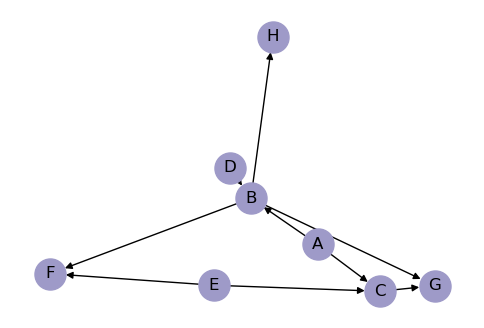

In [25]:
fig, ax = plt.subplots(figsize = (6,4))

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_size = 500, label=True, node_color='#9e9ac8')
plt.axis('off')

#### Aggregate Network 

We create a directed network based on data we have.

In [26]:
G_sponsor = nx.from_pandas_edgelist(edgelist, 'sponsorParty', 'supportParty', 'freq', create_using=nx.DiGraph)
G_sponsor.remove_edges_from(nx.selfloop_edges(G_sponsor))

In [27]:
node_attr = nodelist.set_index('party').to_dict('index')
nx.set_node_attributes(G_sponsor, values=node_attr)

In [28]:
#nx.draw_networkx_edges?
#nx.draw_networkx_nodes?
#nx.draw_networkx_labels?

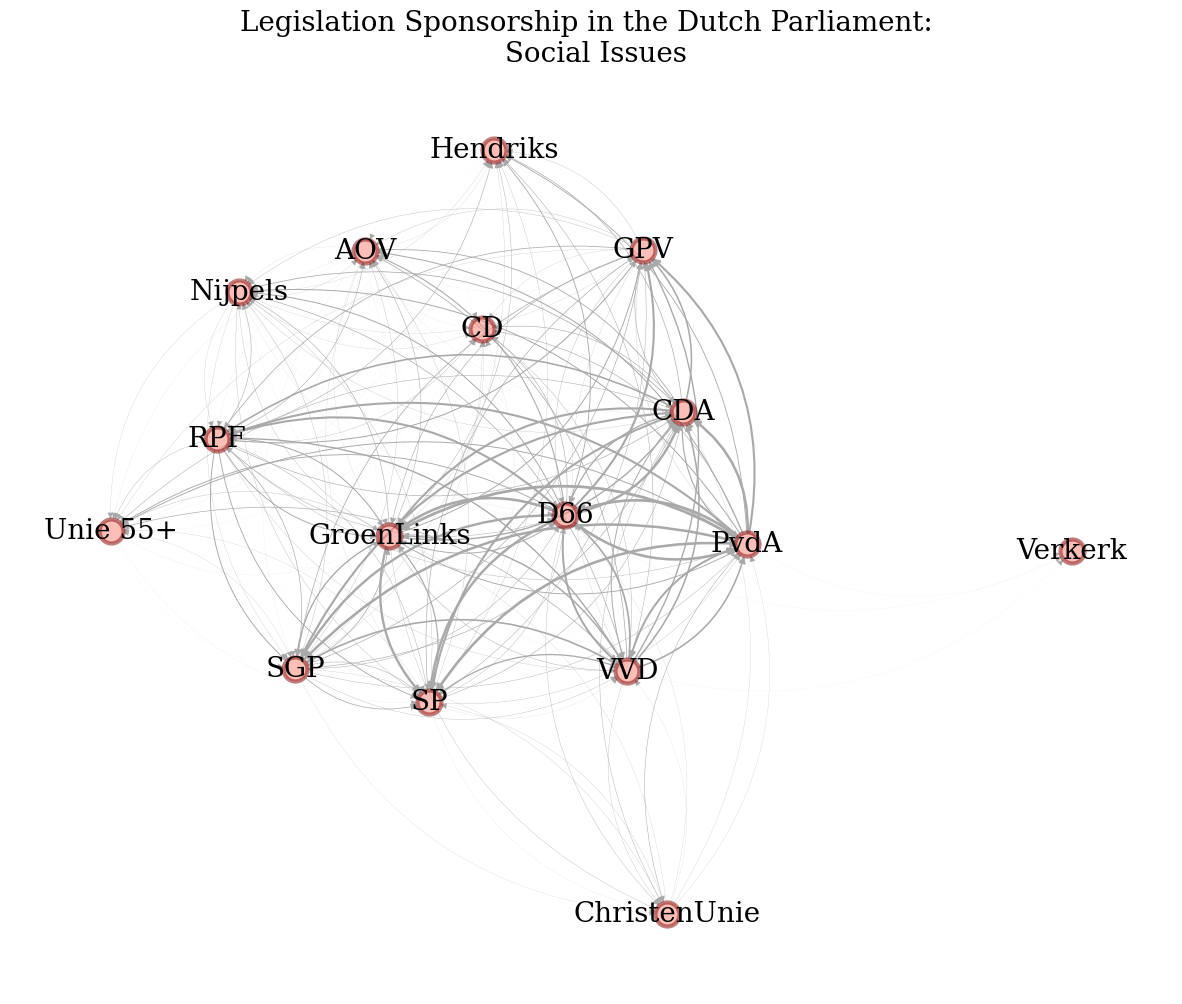

In [29]:
fig, ax = plt.subplots(figsize = (15, 12))

nx.draw_networkx_nodes(G = G_sponsor, 
                       pos = nx.kamada_kawai_layout(G_sponsor), 
                       node_color = 'salmon',
                       edgecolors = 'maroon', 
                       linewidths = 3,
                       alpha=0.5, 
                       ax=ax)

nx.draw_networkx_edges(G = G_sponsor, 
                       pos = nx.kamada_kawai_layout(G_sponsor), 
                       width = [G_sponsor.edges[n]['freq']/100 for n in G_sponsor.edges], 
                       edge_color='darkgrey',
                       connectionstyle="arc3,rad=0.3" ,
                       alpha=1, 
                       arrows = True, 
                       arrowsize=10, 
                       ax=ax)

#nx.draw_networkx_labels(G = G_sponsor, pos = nx.kamada_kawai_layout(G_sponsor))

nx.draw_networkx_labels(G = G_sponsor, 
                        pos = nx.kamada_kawai_layout(G_sponsor), 
                        font_size=20, 
                        font_family = 'serif', 
                        font_color="black")


    
plt.title('Legislation Sponsorship in the Dutch Parliament: \n Social Issues', size=20, color='black', family = 'serif')
plt.axis('off')
    
    
plt.savefig("/Users/rafiazkahilman/Documents/Workshop/SICSS 2024/network/figures/sponsor.png", dpi=300)

What could do to improve to make it more informative? 
Add node attributes based on information provided in the nodelist.
- node and label size: frequency of taking parliamentary roles
- node color: ideology

/opt/homebrew/anaconda3/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


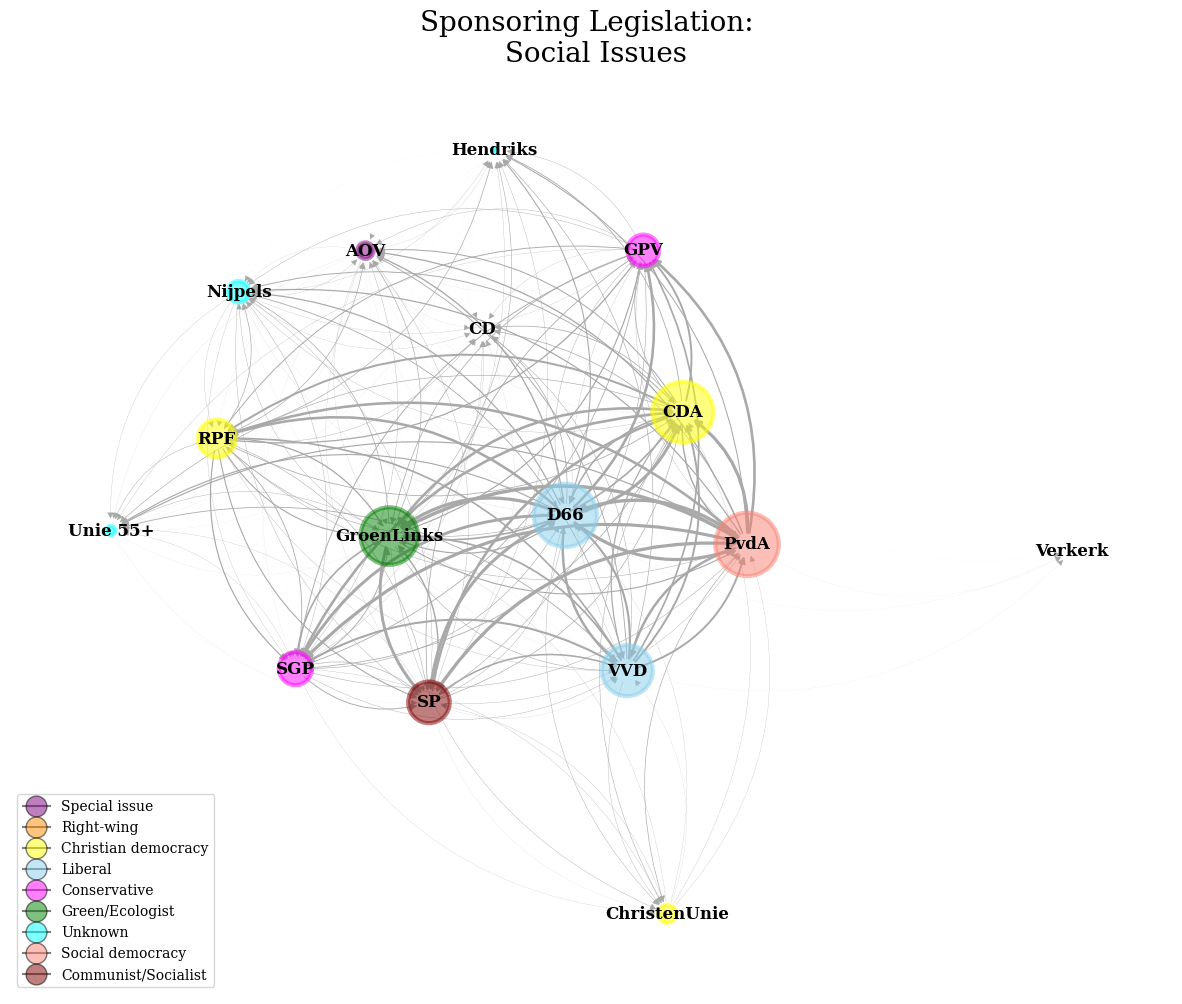

In [30]:
#node size: frequency of being sponsor
fig, ax = plt.subplots(figsize = (15, 12))

pos = nx.kamada_kawai_layout(G_sponsor)
G = G_sponsor

nx.draw_networkx_nodes(G = G, 
                       pos = pos, 
                       node_color = [G.nodes[n]['color'] for n in G.nodes],
                       cmap=plt.cm.Set2,
                       #edgecolors = 'maroon', 
                       linewidths = 3,
                       node_size = [G.nodes[n]['freq_sponsor']*10 for n in G.nodes],
                       alpha=0.5, 
                       ax=ax)

nx.draw_networkx_edges(G = G, 
                       pos = pos, 
                       width = [G.edges[n]['freq']/80 for n in G.edges], 
                       edge_color='darkgrey',
                       connectionstyle="arc3,rad=0.3" ,
                       alpha=1, 
                       arrows = True, 
                       arrowsize=10, 
                       ax=ax)

nx.draw_networkx_labels(G = G, 
                        pos = pos,
                        font_family = 'serif', 
                        font_weight = 'bold',
                        font_color = "black")
#legend: ideology
legend_elements = [
    Line2D([0], [0], marker='o', color='black', label='Special issue', markerfacecolor='purple', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Right-wing', markerfacecolor='darkorange', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Christian democracy', markerfacecolor='yellow', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Liberal', markerfacecolor='skyblue', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Conservative', markerfacecolor='magenta', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Green/Ecologist', markerfacecolor='green', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Unknown', markerfacecolor='cyan', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Social democracy', markerfacecolor='salmon', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Communist/Socialist', markerfacecolor='maroon', 
           markersize=15, alpha=0.5)]
plt.legend(handles=legend_elements, loc='lower left')

plt.title('Sponsoring Legislation: \n Social Issues', size=20, color='black', family = 'serif')
plt.axis('off')
    
    
plt.savefig("/Users/rafiazkahilman/Documents/Workshop/SICSS 2024/network/figures/ss_sponsor.png", dpi=300)

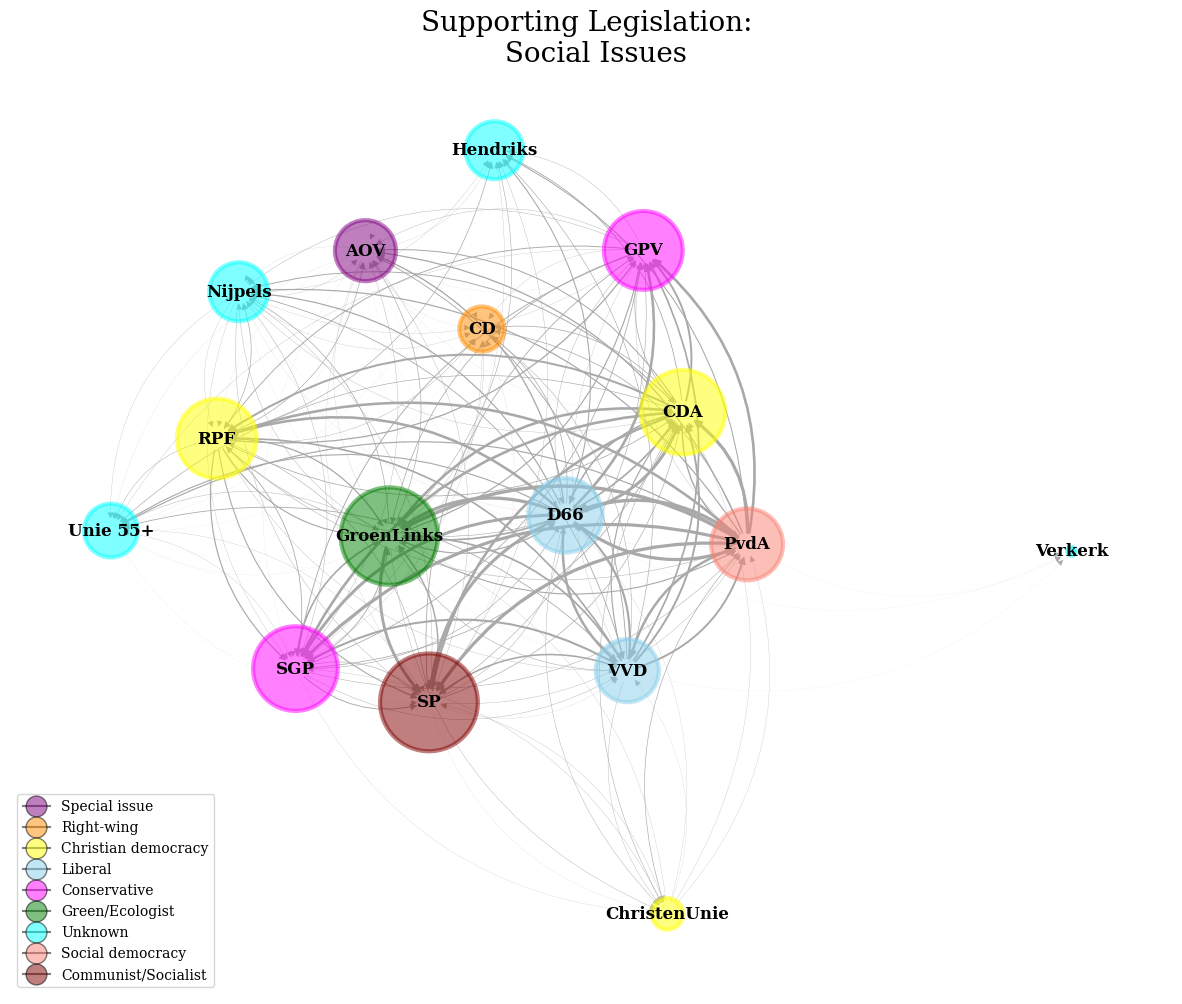

In [31]:
#node size: frequency of being supporter
fig, ax = plt.subplots(figsize = (15, 12))

nx.draw_networkx_nodes(G = G, 
                       pos = pos, 
                       node_color = [G.nodes[n]['color'] for n in G.nodes],
                       cmap=plt.cm.Set2,
                       #edgecolors = 'maroon', 
                       linewidths = 3,
                       node_size = [G.nodes[n]['freq_support']*10 for n in G.nodes],
                       alpha=0.5, 
                       ax=ax)

nx.draw_networkx_edges(G = G, 
                       pos = pos, 
                       width = [G.edges[n]['freq']/80 for n in G.edges], 
                       edge_color='darkgrey',
                       connectionstyle="arc3,rad=0.3" ,
                       alpha=1, 
                       arrows = True, 
                       arrowsize=10, 
                       ax=ax)

nx.draw_networkx_labels(G = G, 
                        pos = pos,
                        font_family = 'serif', 
                        font_weight = 'bold',
                        font_color = "black")
#legend: ideology
legend_elements = [
    Line2D([0], [0], marker='o', color='black', label='Special issue', markerfacecolor='purple', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Right-wing', markerfacecolor='darkorange', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Christian democracy', markerfacecolor='yellow', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Liberal', markerfacecolor='skyblue', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Conservative', markerfacecolor='magenta', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Green/Ecologist', markerfacecolor='green', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Unknown', markerfacecolor='cyan', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Social democracy', markerfacecolor='salmon', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Communist/Socialist', markerfacecolor='maroon', 
           markersize=15, alpha=0.5)]
plt.legend(handles=legend_elements, loc='lower left')

plt.title('Supporting Legislation: \n Social Issues', size=20, color='black', family = 'serif')
plt.axis('off')
    
    
plt.savefig("/Users/rafiazkahilman/Documents/Workshop/SICSS 2024/network/figures/ss_support.png", dpi=300)

#### Network by Outcome

In [32]:
edgelist_adopt = SocialSecurity[SocialSecurity['result'] == 'adopted'].reset_index(
    drop=True)[['sponsorParty', 'supportParty', 'id']]
edgelist_adopt = pd.DataFrame(edgelist_adopt.groupby(['supportParty', 'sponsorParty'])['id'].nunique()).reset_index()
edgelist_adopt.columns = ['supportParty', 'sponsorParty', 'freq']
edgelist_adopt['outcome'] = 'adopted'
edgelist_adopt['color'] = 'darkblue'
edgelist_adopt.head(1)

supportParty sponsorParty  freq  outcome     color
0          AOV          AOV     2  adopted  darkblue

In [33]:
edgelist_reject = SocialSecurity[SocialSecurity['result'] == 'rejected'].reset_index(
    drop=True)[['sponsorParty', 'supportParty', 'id']]
edgelist_reject = pd.DataFrame(edgelist_reject.groupby(['supportParty', 'sponsorParty'])['id'].nunique()).reset_index()
edgelist_reject.columns = ['supportParty', 'sponsorParty', 'freq']
edgelist_reject['color'] = 'red'
edgelist_reject.head(1)

supportParty sponsorParty  freq color
0          AOV          AOV    11   red

In [34]:
edgelist_outcome = pd.concat([edgelist_adopt, edgelist_reject], ignore_index=True)
edgelist_outcome.head(1)

supportParty sponsorParty  freq  outcome     color
0          AOV          AOV     2  adopted  darkblue

In [35]:
G_sponsor_outcome = nx.from_pandas_edgelist(edgelist_outcome, 'sponsorParty', 'supportParty', 
                                            ['freq', 'outcome', 'color'], 
                                            create_using=nx.DiGraph)
G_sponsor_outcome.remove_edges_from(nx.selfloop_edges(G_sponsor_outcome))


nx.set_node_attributes(G_sponsor_outcome, values=node_attr)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


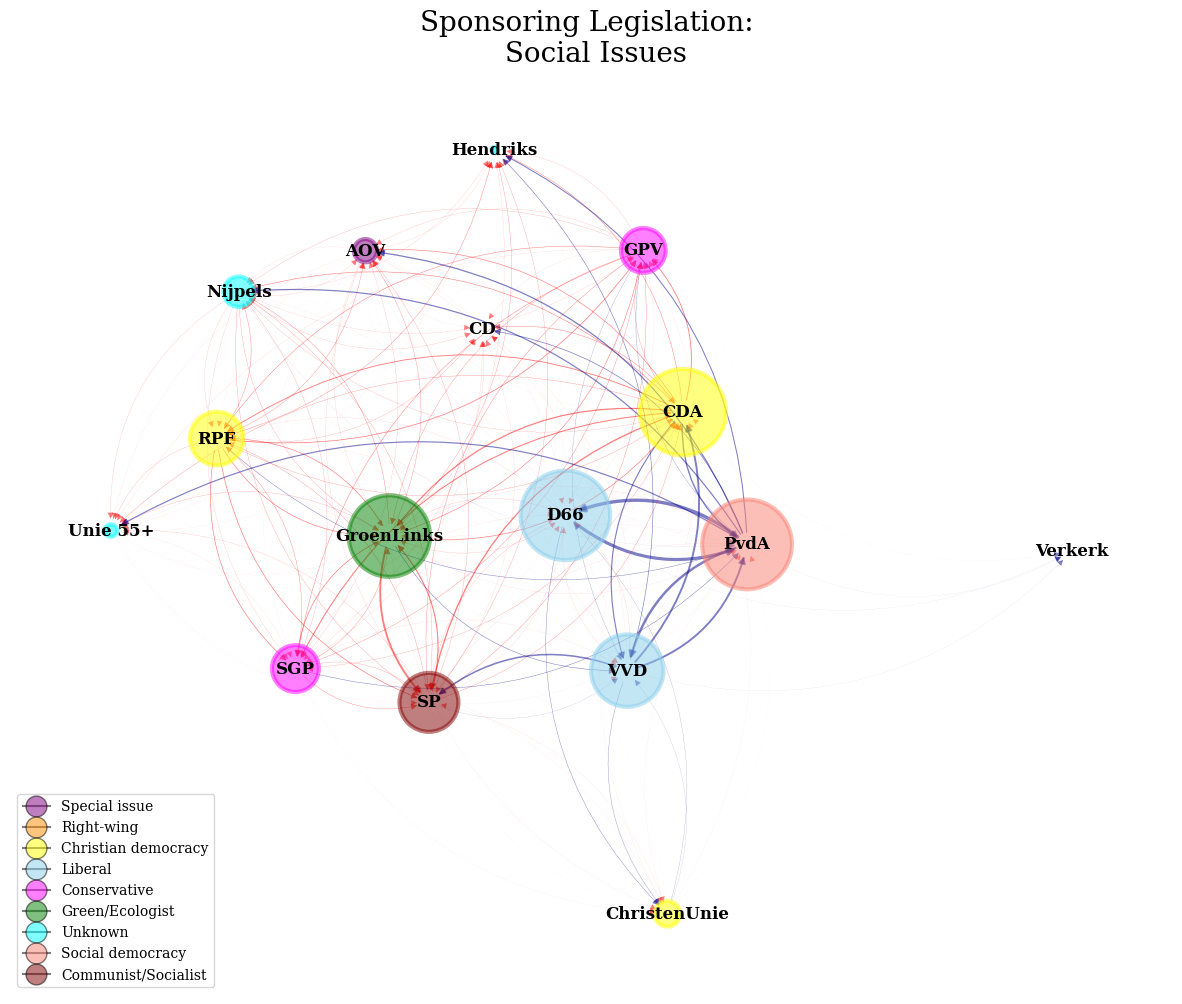

In [36]:
#node size: frequency of being sponsor
fig, ax = plt.subplots(figsize = (15, 12))

pos = nx.kamada_kawai_layout(G_sponsor)
G = G_sponsor_outcome

nx.draw_networkx_nodes(G = G, 
                       pos = pos, 
                       node_color = [G.nodes[n]['color'] for n in G.nodes],
                       cmap=plt.cm.Set2,
                       #edgecolors = 'maroon', 
                       linewidths = 3,
                       node_size = [G.nodes[n]['freq_sponsor']*20 for n in G.nodes],
                       alpha=0.5, 
                       ax=ax)

nx.draw_networkx_edges(G = G, 
                       pos = pos, 
                       width = [G.edges[n]['freq']/80 for n in G.edges], 
                       edge_color = list(nx.get_edge_attributes(G_sponsor_outcome, 'color').values()),
                       connectionstyle="arc3,rad=0.3" ,
                       alpha=0.5, 
                       arrows = True, 
                       arrowsize=10, 
                       ax=ax)

nx.draw_networkx_labels(G = G, 
                        pos = pos,
                        font_family = 'serif', 
                        font_weight = 'bold',
                        font_color = "black")
#legend: ideology
legend_elements = [
    Line2D([0], [0], marker='o', color='black', label='Special issue', markerfacecolor='purple', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Right-wing', markerfacecolor='darkorange', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Christian democracy', markerfacecolor='yellow', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Liberal', markerfacecolor='skyblue', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Conservative', markerfacecolor='magenta', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Green/Ecologist', markerfacecolor='green', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Unknown', markerfacecolor='cyan', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Social democracy', markerfacecolor='salmon', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Communist/Socialist', markerfacecolor='maroon', 
           markersize=15, alpha=0.5)]
plt.legend(handles=legend_elements, loc='lower left')

plt.title('Sponsoring Legislation: \n Social Issues', size=20, color='black', family = 'serif')
plt.axis('off')
    
    
plt.savefig("/Users/rafiazkahilman/Documents/Workshop/SICSS 2024/network/figures/ss_sponsor_outcome.png", dpi=300)

In [37]:
G_sponsor_adopt = nx.from_pandas_edgelist(edgelist_adopt, 'sponsorParty', 'supportParty', 'freq', create_using=nx.DiGraph)
G_sponsor_adopt.remove_edges_from(nx.selfloop_edges(G_sponsor_adopt))

nx.set_node_attributes(G_sponsor_adopt, values=node_attr)

In [38]:
G_sponsor_reject = nx.from_pandas_edgelist(edgelist_reject, 'sponsorParty', 'supportParty', 'freq', create_using=nx.DiGraph)
G_sponsor_reject.remove_edges_from(nx.selfloop_edges(G_sponsor_reject))

nx.set_node_attributes(G_sponsor_reject, values=node_attr)

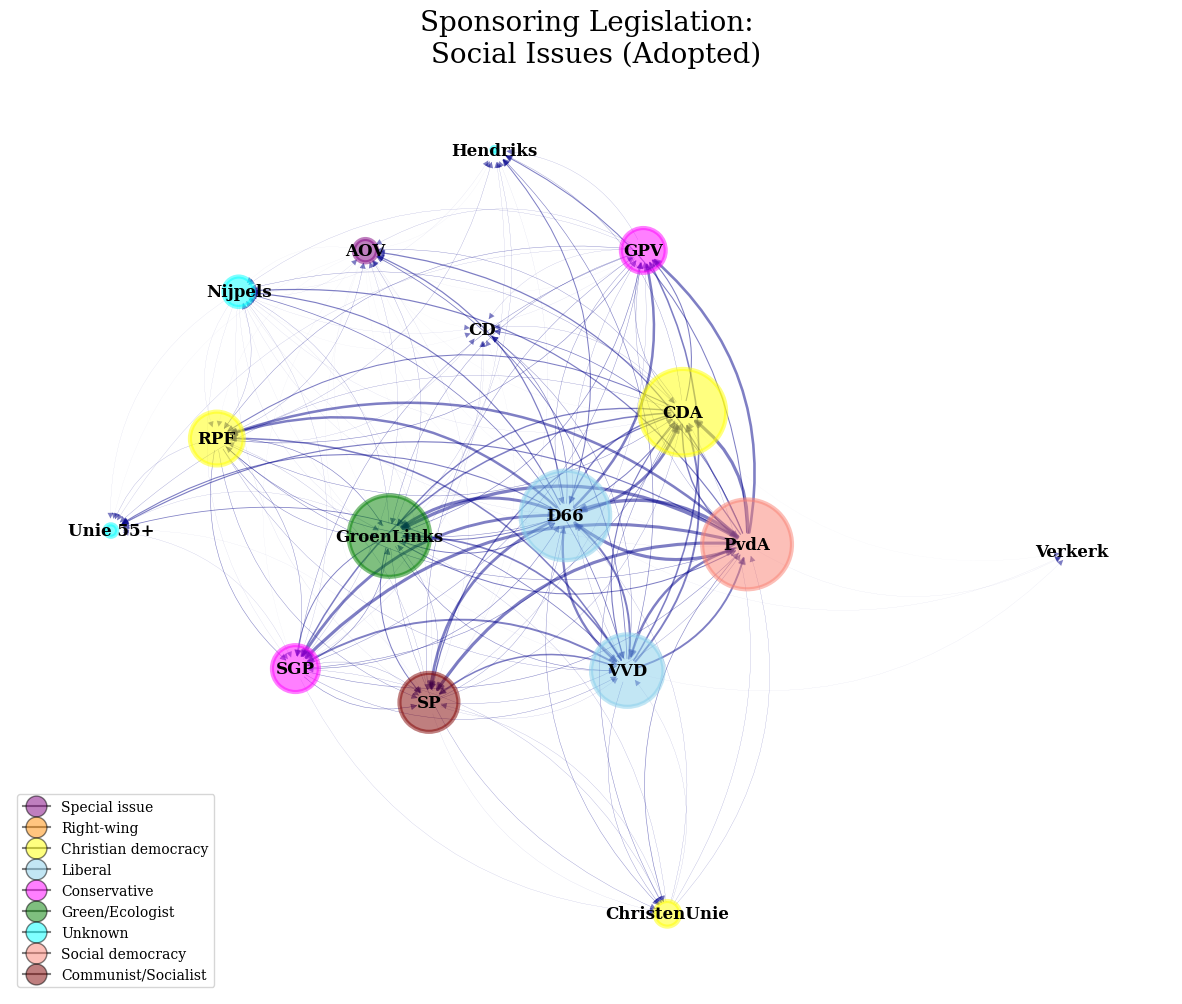

In [39]:
#node size: frequency of being sponsor
fig, ax = plt.subplots(figsize = (15, 12))

pos = nx.kamada_kawai_layout(G_sponsor)
G = G_sponsor_adopt

nx.draw_networkx_nodes(G = G, 
                       pos = pos, 
                       node_color = [G.nodes[n]['color'] for n in G.nodes],
                       cmap=plt.cm.Set2,
                       #edgecolors = 'maroon', 
                       linewidths = 3,
                       node_size = [G.nodes[n]['freq_sponsor']*20 for n in G.nodes],
                       alpha=0.5, 
                       ax=ax)

nx.draw_networkx_edges(G = G, 
                       pos = pos, 
                       width = [G.edges[n]['freq']/80 for n in G.edges], 
                       edge_color='darkblue',
                       connectionstyle="arc3,rad=0.3" ,
                       alpha=0.5, 
                       arrows = True, 
                       arrowsize=10, 
                       ax=ax)

nx.draw_networkx_labels(G = G, 
                        pos = pos,
                        font_family = 'serif', 
                        font_weight = 'bold',
                        font_color = "black")
#legend: ideology
legend_elements = [
    Line2D([0], [0], marker='o', color='black', label='Special issue', markerfacecolor='purple', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Right-wing', markerfacecolor='darkorange', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Christian democracy', markerfacecolor='yellow', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Liberal', markerfacecolor='skyblue', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Conservative', markerfacecolor='magenta', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Green/Ecologist', markerfacecolor='green', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Unknown', markerfacecolor='cyan', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Social democracy', markerfacecolor='salmon', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Communist/Socialist', markerfacecolor='maroon', 
           markersize=15, alpha=0.5)]
plt.legend(handles=legend_elements, loc='lower left')

plt.title('Sponsoring Legislation: \n Social Issues (Adopted)', size=20, color='black', family = 'serif')
plt.axis('off')
    
    
plt.savefig("/Users/rafiazkahilman/Documents/Workshop/SICSS 2024/network/figures/ss_sponsor_adopt.png", dpi=300)

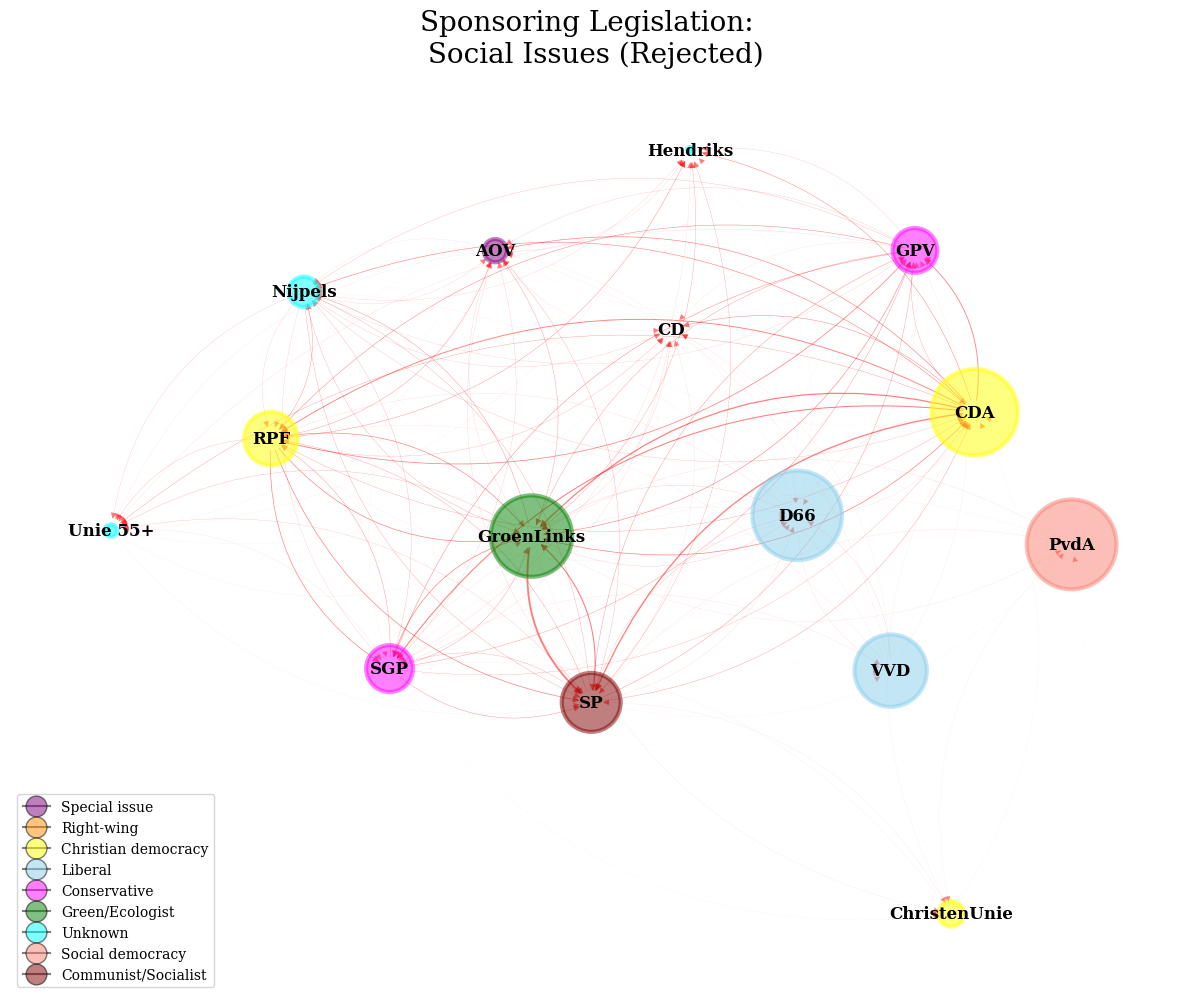

In [40]:
#node size: frequency of being sponsor
fig, ax = plt.subplots(figsize = (15, 12))

pos = nx.kamada_kawai_layout(G_sponsor)
G = G_sponsor_reject

nx.draw_networkx_nodes(G = G, 
                       pos = pos, 
                       node_color = [G.nodes[n]['color'] for n in G.nodes],
                       cmap=plt.cm.Set2,
                       #edgecolors = 'maroon', 
                       linewidths = 3,
                       node_size = [G.nodes[n]['freq_sponsor']*20 for n in G.nodes],
                       alpha=0.5, 
                       ax=ax)

nx.draw_networkx_edges(G = G, 
                       pos = pos, 
                       width = [G.edges[n]['freq']/80 for n in G.edges], 
                       edge_color='red',
                       connectionstyle="arc3,rad=0.3" ,
                       alpha=0.5, 
                       arrows = True, 
                       arrowsize=10, 
                       ax=ax)

nx.draw_networkx_labels(G = G, 
                        pos = pos,
                        font_family = 'serif', 
                        font_weight = 'bold',
                        font_color = "black")
#legend: ideology
legend_elements = [
    Line2D([0], [0], marker='o', color='black', label='Special issue', markerfacecolor='purple', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Right-wing', markerfacecolor='darkorange', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Christian democracy', markerfacecolor='yellow', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Liberal', markerfacecolor='skyblue', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Conservative', markerfacecolor='magenta', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Green/Ecologist', markerfacecolor='green', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Unknown', markerfacecolor='cyan', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Social democracy', markerfacecolor='salmon', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Communist/Socialist', markerfacecolor='maroon', 
           markersize=15, alpha=0.5)]
plt.legend(handles=legend_elements, loc='lower left')

plt.title('Sponsoring Legislation: \n Social Issues (Rejected)', size=20, color='black', family = 'serif')
plt.axis('off')
    
    
plt.savefig("/Users/rafiazkahilman/Documents/Workshop/SICSS 2024/network/figures/ss_sponsor_reject.png", dpi=300)

<div class="alert alert-info"><code 
    style="background:none;
    font-family:Arial;
    font-size: 25px">Measures at the Network Level</code></left>
</div>

#### Degree Distribution 

We use degree because the frequency (counted as weight) matters here to potray the relational intensity and proximity.
- Total degree: The sum of edge weights of the adjacent edges for each vertex
- In-degree: The sum of inward link weights
- Out-degree: The sum of outward link weights

We could observe the Weighted Node Degree separately based on the edge type:
- In-strength: Number of bills supported by its counterparts
- Out-strength: Number of bills sponsored by itself
- Total strength: Total number of bills it sponsors and support

In [41]:
degree_sequence = sorted((d for n, d in G_sponsor.degree(weight='freq_')), reverse=True)
dmax = max(degree_sequence)

indegree_sequence = sorted((d for n, d in G_sponsor.in_degree()), reverse=True)
indmax = max(indegree_sequence)

outdegree_sequence = sorted((d for n, d in G_sponsor.out_degree()), reverse=True)
outdmax = max(indegree_sequence)

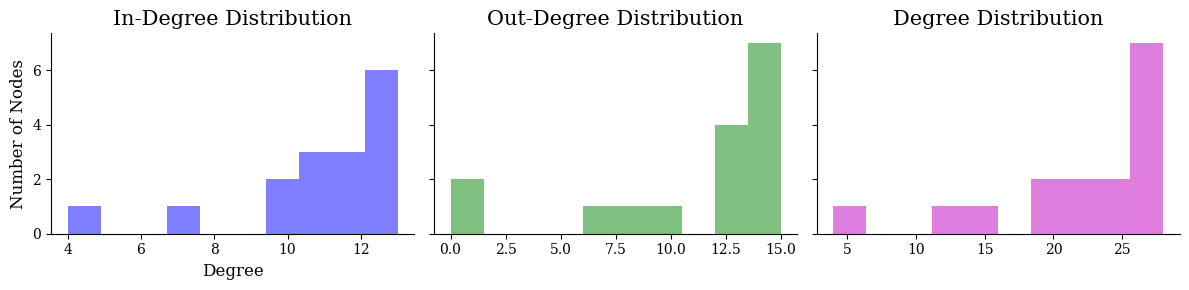

In [42]:
fig, ax = plt.subplots(figsize = (12, 3), nrows=1, ncols=3, sharex=False, sharey=True)

ax[0].hist(indegree_sequence, alpha=0.5, color='b')
ax[1].hist(outdegree_sequence, alpha=0.5, color='g')
ax[2].hist(degree_sequence, alpha=0.5, color='m')

#plt.title("Degree Distribution", size=15, color='black', family = 'serif', loc='center')

ax[0].set_xlabel("Degree", size=12, color='black', family = 'serif')
ax[0].set_ylabel("Number of Nodes", size=12, color='black', family = 'serif')

ax[0].set_title("In-Degree Distribution", size=15, color='black', family = 'serif', loc='center')
ax[1].set_title("Out-Degree Distribution", size=15, color='black', family = 'serif', loc='center')
ax[2].set_title("Degree Distribution", size=15, color='black', family = 'serif', loc='center')


fig.tight_layout()
sns.despine()

plt.savefig("/Users/rafiazkahilman/Documents/Workshop/SICSS 2024/network/figures/ss_degdist.png", dpi=300)

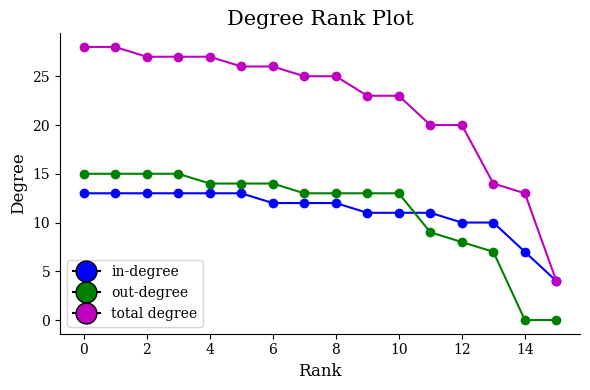

In [43]:
fig, ax = plt.subplots(figsize = (6, 4))

ax.plot(indegree_sequence, "b-", marker="o")
ax.plot(outdegree_sequence, "g-", marker="o")
ax.plot(degree_sequence, "m-", marker="o")
ax.set_title("Degree Rank Plot", size=15, color='black', family = 'serif')
ax.set_ylabel("Degree", size=12, color='black', family = 'serif')
ax.set_xlabel("Rank", size=12, color='black', family = 'serif')

legend_elements = [
    Line2D([0], [0], marker='o', color='black', label='in-degree', markerfacecolor='b', 
           markersize=15, alpha=1),
    Line2D([0], [0], marker='o', color='black', label='out-degree', markerfacecolor='g', 
           markersize=15, alpha=1),
    Line2D([0], [0], marker='o', color='black', label='total degree', markerfacecolor='m', 
           markersize=15, alpha=1)]
plt.legend(handles=legend_elements, loc='lower left')


fig.tight_layout()
sns.despine()

plt.savefig("/Users/rafiazkahilman/Documents/Workshop/SICSS 2024/network/figures/ss_degrank.png", dpi=300)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


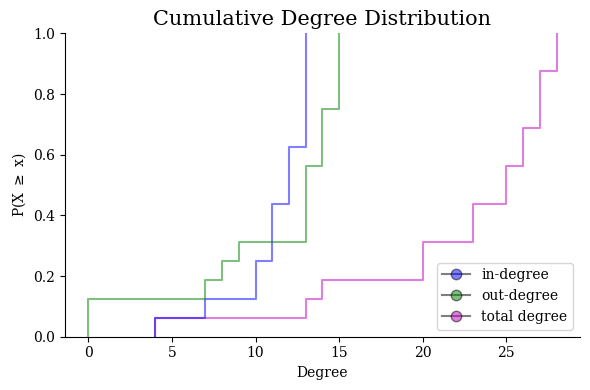

In [44]:
fig, ax = plt.subplots(figsize = (6, 4))

sns.ecdfplot(data=degree_sequence, color='m', alpha=0.5)
sns.ecdfplot(data=indegree_sequence, color='b', alpha=0.5)
sns.ecdfplot(data=outdegree_sequence, color='g', alpha=0.5)

plt.title("Cumulative Degree Distribution", size=15, color='black', family = 'serif')
plt.ylabel("P(X $\geq$ x)")
plt.xlabel("Degree")

legend_elements = [
    Line2D([0], [0], marker='.', color='black', label='in-degree', markerfacecolor='b', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='.', color='black', label='out-degree', markerfacecolor='g', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='.', color='black', label='total degree', markerfacecolor='m', 
           markersize=15, alpha=0.5)]
plt.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
sns.despine()

plt.savefig("/Users/rafiazkahilman/Documents/Workshop/SICSS 2024/network/figures/ss_degcumdist.png", dpi=300)

#### Density

https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.density.html

Density in the network indicates a ratio between existing edges compared to number of posible edges for given number of nodes.
- Complete network: d=1
- Isolates: d= 0

For undirected network, it is formulated as : 
<center> $d = \frac{2|E|}{|V|(|V|-1)}$ </center>

Meanwhile for directed network, it follows: 
<center> $d = \frac{|E|}{|V|(|V|-1)}$ </center>

where $V$ is the number of nodes and $E$ is the number of edges in network $G$.

In [45]:
print("Network density:", round(nx.density(G_sponsor), 2))

Network density: 0.74


#### Shortest Path Length

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path_length.html

For all possible pairs of nodes in the network, shortest path length is measured by taking the average number of steps along the shortest paths. It reveals the efficiency of message-passing activity/information flow in the network.

For digraphs this returns the shortest directed path length. To find path lengths in the reverse direction use G.reverse(copy=False) first to flip the edge orientation.

In [46]:
pl_unw = pd.DataFrame(dict(nx.shortest_path_length(G_sponsor)).values())
pl_unw.index = [list(dict(nx.shortest_path_length(G_sponsor)).keys())]
pl_unw = pl_unw.reindex(pl_unw.index)
pl_unw.head(2)

AOV   CD  CDA  D66  GPV  GroenLinks  Hendriks  Nijpels  PvdA  RPF  SGP  \
AOV  0.0  1.0  1.0  1.0  1.0         1.0       1.0      1.0   1.0  1.0  1.0   
CDA  1.0  1.0  0.0  1.0  1.0         1.0       1.0      1.0   1.0  1.0  1.0   

      SP  Unie 55+  VVD  ChristenUnie  Verkerk  
AOV  1.0       1.0  1.0           2.0      2.0  
CDA  1.0       1.0  1.0           1.0      1.0

In [47]:
pl_df_unw = pd.DataFrame(pl_unw.replace(0, pd.NA).stack().index.to_list())
pl_df_unw.columns = ['source', 'target']
pl_df_unw['pl'] = pl_unw.replace(0, pd.NA).stack().to_list()
pl_df_unw.head(2)

source target   pl
0    AOV     CD  1.0
1    AOV    CDA  1.0

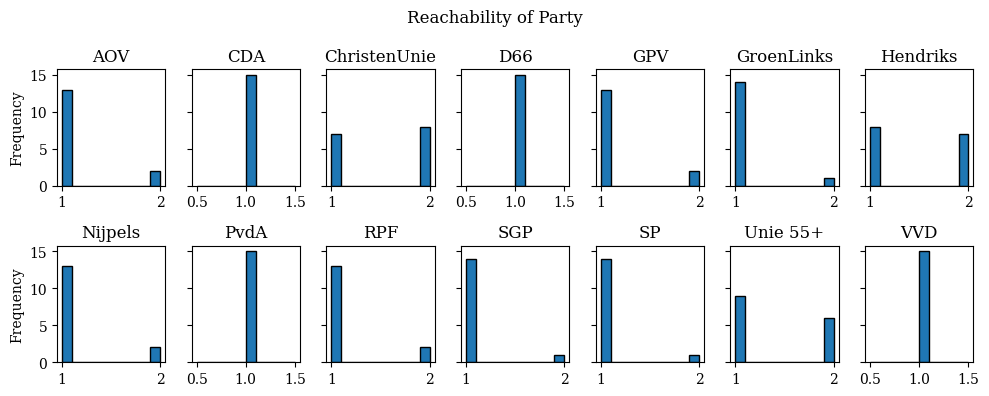

<Figure size 640x480 with 0 Axes>

In [48]:
fig, ax = plt.subplots(figsize = (10, 4), nrows=2, ncols=7, sharex=False, sharey=True)

pl_df_unw.plot.hist(column=["pl"], by="source", ax=ax, ec="k", legend=False, 
               title="Reachability of Party")

plt.tight_layout()
plt.show()

plt.savefig("/Users/rafiazkahilman/Documents/Workshop/SICSS 2024/network/figures/ss_pl_unw.png", dpi=300)

In [49]:
pl_w = pd.DataFrame(dict(nx.shortest_path_length(G_sponsor, weight='freq')).values())
pl_w.index = [list(dict(nx.shortest_path_length(G_sponsor, weight='freq')).keys())]
pl_w = pl_w.reindex(pl_w.index)
pl_w.head(2)

AOV  PvdA   VVD   D66   GPV   RPF  CDA   SGP  Verkerk    CD  Unie 55+  \
AOV   0.0   2.0   2.0   4.0   4.0   4.0  5.0   5.0      5.0   6.0       6.0   
CDA  40.0  41.0  37.0  37.0  44.0  44.0  0.0  37.0      1.0  39.0      36.0   

     Nijpels  Hendriks  GroenLinks    SP  ChristenUnie  
AOV      7.0      10.0        10.0  10.0          15.0  
CDA     37.0      40.0        40.0  40.0          29.0

In [50]:
pl_df_w = pd.DataFrame(pl_w.replace(0, pd.NA).stack().index.to_list())
pl_df_w.columns = ['source', 'target']
pl_df_w['pl'] = pl_w.replace(0, pd.NA).stack().to_list()
pl_df_w.head(2)

source target   pl
0    AOV   PvdA  2.0
1    AOV    VVD  2.0

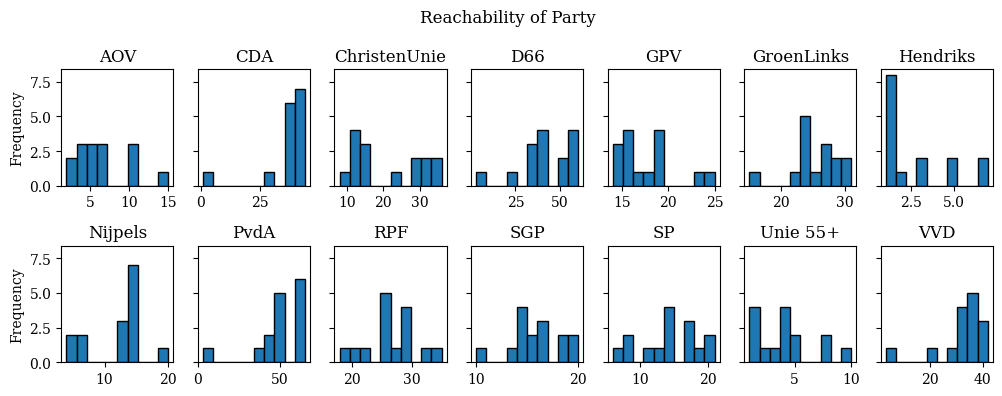

<Figure size 640x480 with 0 Axes>

In [51]:
fig, ax = plt.subplots(figsize = (10, 4), nrows=2, ncols=7, sharex=False, sharey=True)

pl_df_w.plot.hist(column=["pl"], by="source", ax=ax, ec="k", legend=False, 
               title="Reachability of Party")

plt.tight_layout()
plt.show()

plt.savefig("/Users/rafiazkahilman/Documents/Workshop/SICSS 2024/network/figures/ss_pl_w.png", dpi=300)

#### Average/Global Clustering  

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.average_clustering.html#networkx.algorithms.cluster.average_clustering

The average clustering coefficient is a measure at network level to capture the tendency to form clustered connections.
- Complete network: C=1
- Isolates: C= 0

It is computed as:
<center> $C = \frac{1}{n}\sum_{v \in G} c_v$ </center>

where $n$ is the number of nodes in network $G$.

In [52]:
print("Global clustering coefficient (unweighted):", round(nx.average_clustering(G_sponsor), 2))
print("Global clustering coefficient (weighted):", round(nx.average_clustering(G_sponsor, weight='freq'), 2))

Global clustering coefficient (unweighted): 0.88
Global clustering coefficient (weighted): 0.16


#### Global Reciprocity

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.reciprocity.reciprocity.html

In a directed network, reciprocity is defined as the ratio of the number of edges pointing in both directions to the total number of edges in the network,
<center> $r = |\frac {{(u,v) \in G|(v,u) \in G}|} {|{(u,v) \in G}|}$ </center> 

where $u$ and $v$ are nodes connected by edges in network $G$.

In [53]:
print("Global reciprocity:", round(nx.reciprocity(G_sponsor), 2))

Global reciprocity: 0.85


#### Assortativity

**Attribute Assortativity**

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.assortativity.attribute_assortativity_coefficient.html#networkx.algorithms.assortativity.attribute_assortativity_coefficient

Attribute assortativity measures the how similar the connections in the network is with respect to the observed qualitative attribute.

In [54]:
print("Attribute assortativity:", round(nx.attribute_assortativity_coefficient(G_sponsor, 'family_name'), 2))

Attribute assortativity: -0.07


**Degree Assortativity**

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.assortativity.degree_assortativity_coefficient.html#networkx.algorithms.assortativity.degree_assortativity_coefficient

Degree assortativity measures the how similar the connections in the network is with respect to the degree distribution.

In [55]:
print("Degree assortativity (unweighted):", round(nx.degree_assortativity_coefficient(G_sponsor, x='out', y='in'), 2))

Degree assortativity (unweighted): -0.26


In [56]:
print("Degree assortativity (weighted):", round(nx.degree_assortativity_coefficient(G_sponsor, x='out', y='in', 
                                                                                   weight='freq'), 2))

Degree assortativity (weighted): -0.14


**Numeric Assortativity**

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.assortativity.numeric_assortativity_coefficient.html#networkx.algorithms.assortativity.numeric_assortativity_coefficient

Numeric assortativity measures the how similar the connections in the network is with respect to the onserved quantitative.

In [57]:
print("Numeric assortativity:", round(nx.numeric_assortativity_coefficient(G_sponsor, 'freq_sponsor'), 2))
print("Numeric assortativity:", round(nx.numeric_assortativity_coefficient(G_sponsor, 'freq_support'), 2))

Numeric assortativity: -0.15
Numeric assortativity: -0.14


<div class="alert alert-info"><code 
    style="background:none;
    font-family:Arial;
    font-size: 25px">Measures at the Group Level</code></left>
</div>

Interchangeable terms: Group <=> Community <=> Cluster

#### Modularity-based Community Detection

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html#networkx.algorithms.community.modularity_max.greedy_modularity_communities

This algorithm is enforced to find communities in network $G$ by using greedy modularity maximization. 
- Step 1: each node in its own community 
- Step 2: repeatedly joins the pair of communities that lead to the largest modularity 
- Step 3: the process stops at the point where no further increase in modularity is possible (a maximum)

Unweighted directed network:

In [58]:
c_mod_unw = nx.community.greedy_modularity_communities(G_sponsor)
print("Number of clusters:", len(c_mod_unw))
print("Cluster 1:", sorted(c_mod_unw[0]))
print("Cluster 2:", sorted(c_mod_unw[1]))

Number of clusters: 2
Cluster 1: ['AOV', 'CD', 'GPV', 'GroenLinks', 'Hendriks', 'Nijpels', 'RPF', 'SGP', 'SP', 'Unie 55+']
Cluster 2: ['CDA', 'ChristenUnie', 'D66', 'PvdA', 'VVD', 'Verkerk']


Weighted directed network:

In [59]:
c_mod_w = nx.community.greedy_modularity_communities(G_sponsor, weight='freq')
print("Number of clusters:", len(c_mod_w))
print("Cluster 1:", sorted(c_mod_w[0]))
print("Cluster 2:", sorted(c_mod_w[1]))

Number of clusters: 2
Cluster 1: ['CDA', 'ChristenUnie', 'D66', 'GPV', 'GroenLinks', 'PvdA', 'RPF', 'SGP', 'SP', 'VVD', 'Verkerk']
Cluster 2: ['AOV', 'CD', 'Hendriks', 'Nijpels', 'Unie 55+']


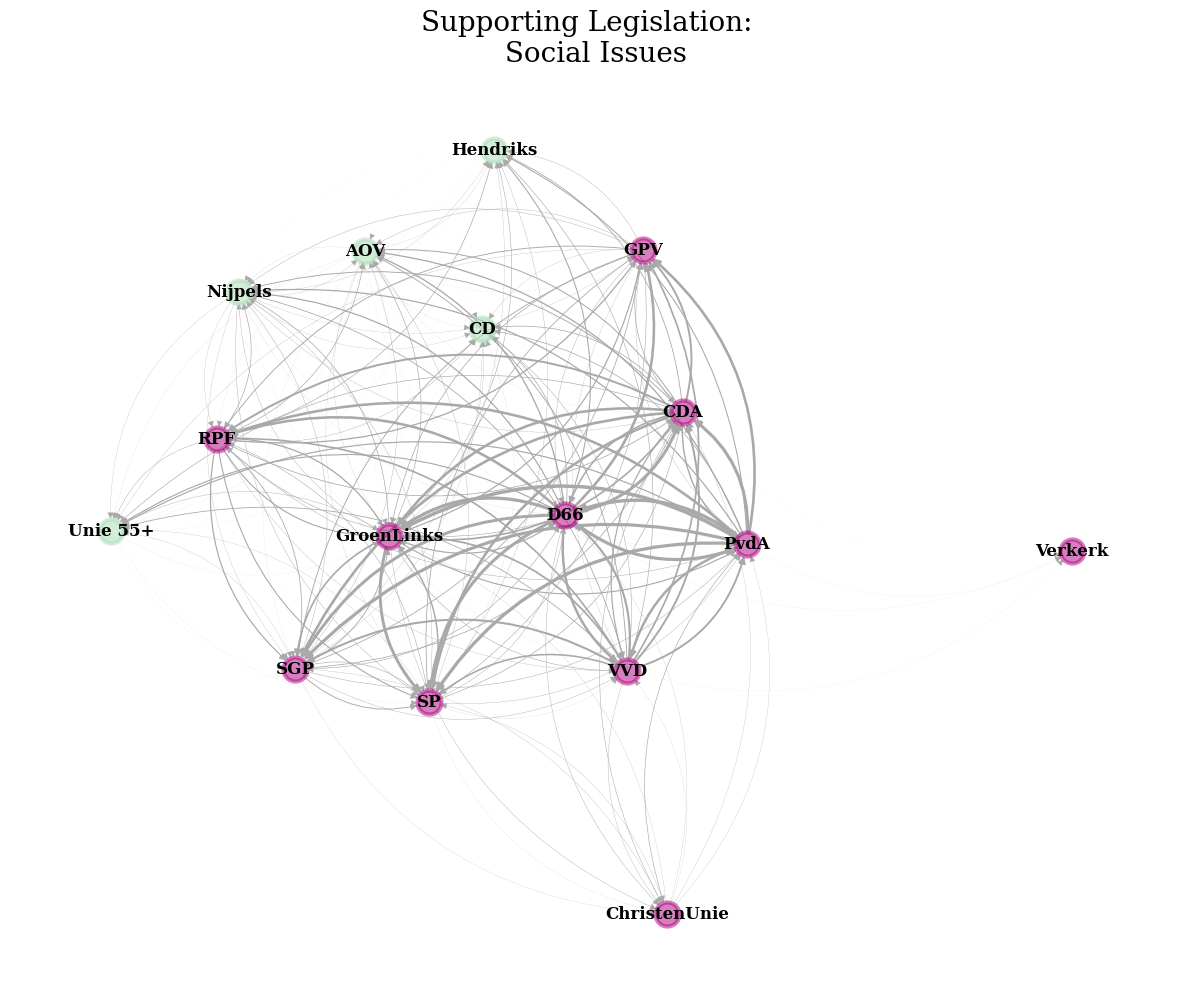

In [60]:
#node size: frequency of being supporter
fig, ax = plt.subplots(figsize = (15, 12))

G = G_sponsor

#cluster 1
nx.draw_networkx_nodes(G = G, 
                       pos = pos, 
                       node_color = '#ae017e',
                       nodelist=c_mod_w[0],
                       #edgecolors = 'maroon', 
                       linewidths = 3,
                       #node_size = [G.nodes[n]['freq_support']*10 for n in G.nodes],
                       alpha=0.5, 
                       ax=ax)

#cluster 2
nx.draw_networkx_nodes(G = G, 
                       pos = pos, 
                       node_color = '#a8ddb5',
                       nodelist=c_mod_w[1],
                       #edgecolors = 'maroon', 
                       linewidths = 3,
                       #node_size = [G.nodes[n]['freq_support']*10 for n in G.nodes],
                       alpha=0.5, 
                       ax=ax)


nx.draw_networkx_edges(G = G, 
                       pos = pos, 
                       width = [G.edges[n]['freq']/80 for n in G.edges], 
                       edge_color='darkgrey',
                       connectionstyle="arc3,rad=0.3" ,
                       alpha=1, 
                       arrows = True, 
                       arrowsize=10, 
                       ax=ax)

nx.draw_networkx_labels(G = G, 
                        pos = pos,
                        font_family = 'serif', 
                        font_weight = 'bold',
                        font_color = "black")

plt.title('Supporting Legislation: \n Social Issues', size=20, color='black', family = 'serif')
plt.axis('off')
    
    
plt.savefig("/Users/rafiazkahilman/Documents/Workshop/SICSS 2024/network/figures/ss_support_mod.png", dpi=300)

#### Modularity

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.modularity.html#networkx.algorithms.community.quality.modularity

Given the presence of groups in a network, modularity calculates separability between those groups. Group saliency is identified by taking the proportion of ties that are within groups in contrast to between groups.  
- High modularity: dense connections within groups but sparse connections between groups
- Low modularity: no distinct structure

<center> $Q = \sum_{c=1}^{n}
\left[ \frac{L_c}{m} - \gamma\left( \frac{k_c}{2m} \right) ^2 \right]$ </center> 

where the sum iterates over all groups $c$, $m$ is the number of edges, $L_c$ is the number of intra-community links for community $c$, $k_c$ is the sum of degrees of the nodes in community $c$, and $\gamma$ is the resolution parameter. While $\gamma$ sets an arbitrary tradeoff between intra-group edges and inter-group edges, it is very common to simply use $\gamma = 1$. 

Unweighted directed network:

In [61]:
print("Modularity (unweighted):", round(nx.community.modularity(G_sponsor, communities=c_mod_unw), 2))

Modularity (unweighted): 0.02


In [62]:
print("Modularity (weighted):", round(nx.community.modularity(G_sponsor, communities=c_mod_w), 2))

Modularity (weighted): 0.01


#### Louvain Community Detection 

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html#networkx.algorithms.community.louvain.louvain_communities

Louvain algorithm detects the presence of commmunities by considering optimal modularity and community aggregation. 
- First step: each node is signed to its neighboring community 
- Second step: measure the change in modularity $\Delta Q$ after the swap
- Third step: if $\Delta Q > 0$, move node into the neighboring community (otherwise, keep in its current community)
- Forth step: repeate the process $\Delta Q = 0$ obtained for all nodes

In [63]:
c_lv_unw = nx.community.louvain_communities(G_sponsor, weight='freq')
print("Number of clusters:", len(c_lv_unw))
print("Cluster 1:", sorted(c_lv_unw[0]))
print("Cluster 2:", sorted(c_lv_unw[1]))
print("Cluster 3:", sorted(c_lv_unw[2]))

Number of clusters: 4
Cluster 1: ['GPV', 'Hendriks', 'RPF']
Cluster 2: ['CDA', 'ChristenUnie', 'GroenLinks', 'SGP', 'SP']
Cluster 3: ['D66', 'PvdA', 'VVD', 'Verkerk']


In [64]:
c_lv_w = nx.community.louvain_communities(G_sponsor)
print("Number of clusters:", len(c_lv_w))
print("Cluster 1:", sorted(c_lv_w[0]))
print("Cluster 2:", sorted(c_lv_w[1]))

Number of clusters: 2
Cluster 1: ['AOV', 'CD', 'GPV', 'GroenLinks', 'Hendriks', 'Nijpels', 'RPF', 'SGP', 'SP', 'Unie 55+']
Cluster 2: ['CDA', 'ChristenUnie', 'D66', 'PvdA', 'VVD', 'Verkerk']


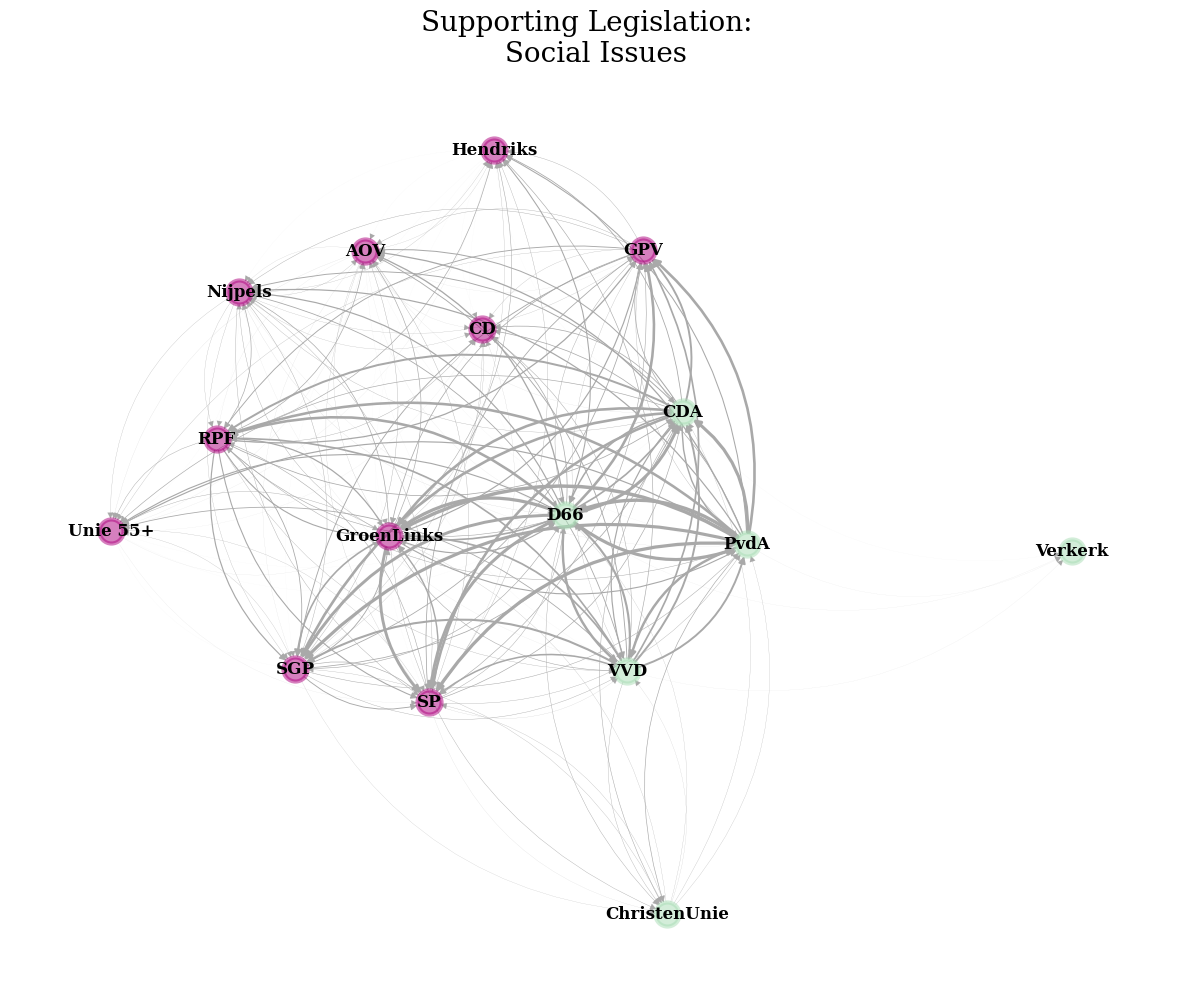

In [65]:
#node size: frequency of being supporter
fig, ax = plt.subplots(figsize = (15, 12))

G = G_sponsor

#cluster 1
nx.draw_networkx_nodes(G = G, 
                       pos = pos, 
                       node_color = '#ae017e',
                       nodelist=c_lv_w[0],
                       #edgecolors = 'maroon', 
                       linewidths = 3,
                       #node_size = [G.nodes[n]['freq_support']*10 for n in G.nodes],
                       alpha=0.5, 
                       ax=ax)

#cluster 2
nx.draw_networkx_nodes(G = G, 
                       pos = pos, 
                       node_color = '#a8ddb5',
                       nodelist=c_lv_w[1],
                       #edgecolors = 'maroon', 
                       linewidths = 3,
                       #node_size = [G.nodes[n]['freq_support']*10 for n in G.nodes],
                       alpha=0.5, 
                       ax=ax)


nx.draw_networkx_edges(G = G, 
                       pos = pos, 
                       width = [G.edges[n]['freq']/80 for n in G.edges], 
                       edge_color='darkgrey',
                       connectionstyle="arc3,rad=0.3" ,
                       alpha=1, 
                       arrows = True, 
                       arrowsize=10, 
                       ax=ax)

nx.draw_networkx_labels(G = G, 
                        pos = pos,
                        font_family = 'serif', 
                        font_weight = 'bold',
                        font_color = "black")

plt.title('Supporting Legislation: \n Social Issues', size=20, color='black', family = 'serif')
plt.axis('off')
    
    
plt.savefig("/Users/rafiazkahilman/Documents/Workshop/SICSS 2024/network/figures/ss_support_lv.png", dpi=300)

#### Centrality-based Community Detection

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html#networkx.algorithms.community.centrality.girvan_newman

Most valuable edge is defined as the one with the highest betweenness centrality as proposed by Girvan-Newman Algorithm. 

Edge betweenness is used as a criteria to iteratively find and remove important edges connecting communities within a larger network. After every edge removal, the algorithm calculates the modularity score $Q$ of the network. The process is terminated once the new modularity doesn't surpass the value from the previous iteration. 

In [66]:
from networkx import edge_betweenness_centrality as betweenness
def most_central_edge(G_sponsor):
    centrality = nx.edge_betweenness_centrality(G_sponsor, weight="freq")
    return max(centrality, key=centrality.get)

c_ng = nx.community.girvan_newman(G_sponsor, most_valuable_edge=most_central_edge)
tuple(sorted(c) for c in next(c_ng))

(['AOV',
  'CD',
  'CDA',
  'ChristenUnie',
  'D66',
  'GPV',
  'GroenLinks',
  'Hendriks',
  'Nijpels',
  'PvdA',
  'RPF',
  'SGP',
  'SP',
  'Unie 55+',
  'VVD'],
 ['Verkerk'])

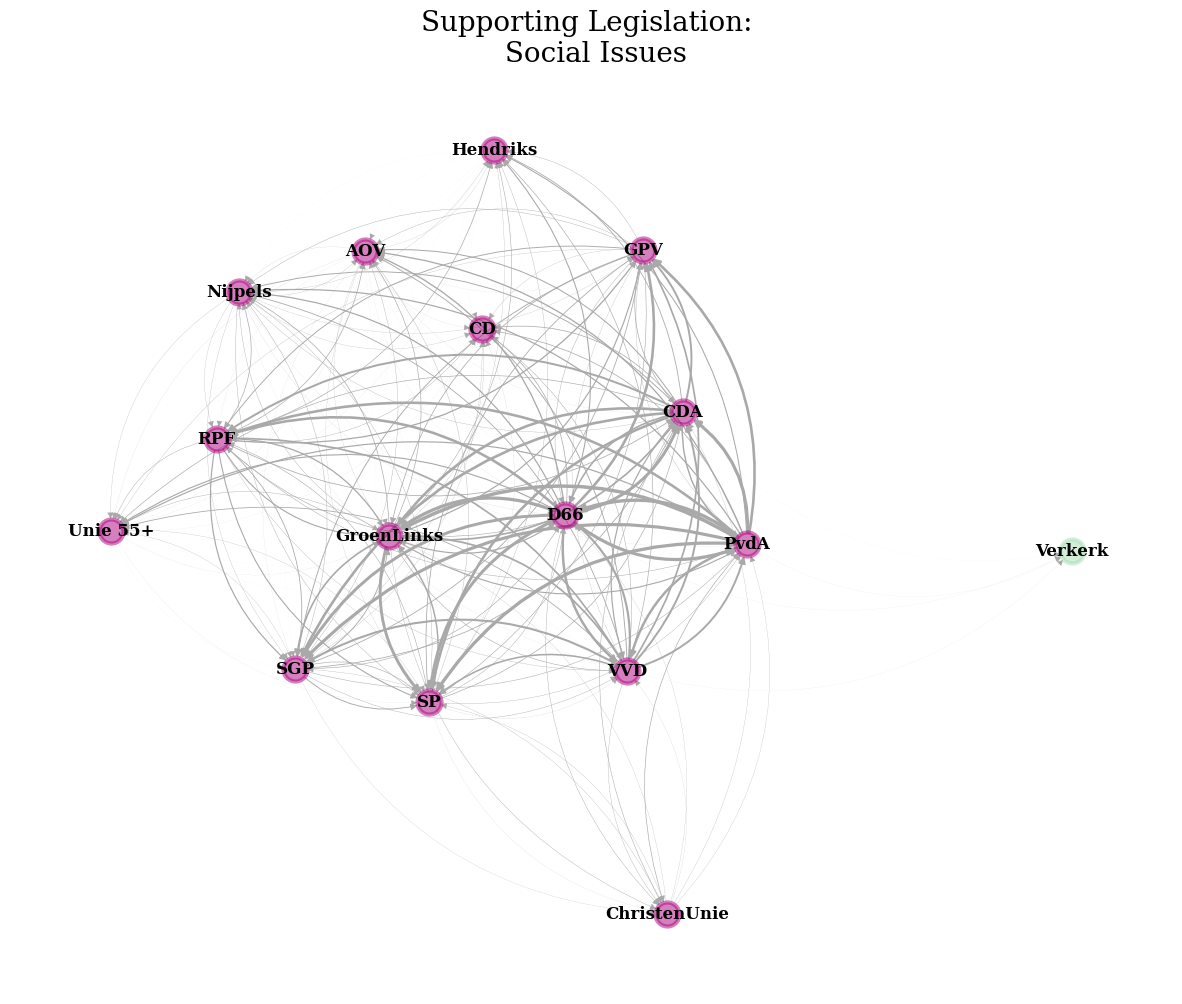

In [67]:
#node size: frequency of being supporter
fig, ax = plt.subplots(figsize = (15, 12))

G = G_sponsor

#cluster 1
nx.draw_networkx_nodes(G = G, 
                       pos = pos, 
                       node_color = '#ae017e',
                       nodelist=['AOV','CD','CDA','ChristenUnie','D66','GPV','GroenLinks','Hendriks','Nijpels','PvdA',
                                 'RPF','SGP','SP','Unie 55+','VVD'],
                       #edgecolors = 'maroon', 
                       linewidths = 3,
                       #node_size = [G.nodes[n]['freq_support']*10 for n in G.nodes],
                       alpha=0.5, 
                       ax=ax)

#cluster 2
nx.draw_networkx_nodes(G = G, 
                       pos = pos, 
                       node_color = '#a8ddb5',
                       nodelist=['Verkerk'],
                       #edgecolors = 'maroon', 
                       linewidths = 3,
                       #node_size = [G.nodes[n]['freq_support']*10 for n in G.nodes],
                       alpha=0.5, 
                       ax=ax)


nx.draw_networkx_edges(G = G, 
                       pos = pos, 
                       width = [G.edges[n]['freq']/80 for n in G.edges], 
                       edge_color='darkgrey',
                       connectionstyle="arc3,rad=0.3" ,
                       alpha=1, 
                       arrows = True, 
                       arrowsize=10, 
                       ax=ax)

nx.draw_networkx_labels(G = G, 
                        pos = pos,
                        font_family = 'serif', 
                        font_weight = 'bold',
                        font_color = "black")

plt.title('Supporting Legislation: \n Social Issues', size=20, color='black', family = 'serif')
plt.axis('off')
    
    
plt.savefig("/Users/rafiazkahilman/Documents/Workshop/SICSS 2024/network/figures/ss_support_gn.png", dpi=300)

<div class="alert alert-info"><code 
    style="background:none;
    font-family:Arial;
    font-size: 25px">Measures at the Node Level</code></left>
</div>

### Node Centrality Metrics

#### Degree Centrality

**Total Degree Centrality**

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html#networkx.algorithms.centrality.degree_centrality

The degree centrality for a node $v$ is the fraction of nodes it is connected to.

In [68]:
deg_cent =  pd.DataFrame(nx.degree_centrality(G_sponsor).keys())
deg_cent['deg_cent'] = list(nx.degree_centrality(G_sponsor).values())
deg_cent.columns = ['party', 'deg_cent']
deg_cent.head(1)

party  deg_cent
0   AOV  1.666667

**In-degree Centrality**

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.in_degree_centrality.html#networkx.algorithms.centrality.in_degree_centrality

The in-degree centrality for a node $v$ is the fraction of nodes its **incoming edges** are connected to.

In [69]:
indeg_cent =  pd.DataFrame(nx.in_degree_centrality(G_sponsor).keys())
indeg_cent['indeg_cent'] = list(nx.in_degree_centrality(G_sponsor).values())
indeg_cent.columns = ['party', 'indeg_cent']
indeg_cent.head(1)

party  indeg_cent
0   AOV         0.8

**Out-degree Centrality**

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.out_degree_centrality.html#networkx.algorithms.centrality.out_degree_centrality

The out-degree centrality for a node $v$ is the fraction of nodes its **outgoing edges** are connected to.

In [70]:
outdeg_cent =  pd.DataFrame(nx.out_degree_centrality(G_sponsor).keys())
outdeg_cent['outdeg_cent'] = list(nx.out_degree_centrality(G_sponsor).values())
outdeg_cent.columns = ['party', 'outdeg_cent']
outdeg_cent.head(1)

party  outdeg_cent
0   AOV     0.866667

#### Betweenness Centrality

**Node Betweenness**

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality

Betweenness centrality of a node $v$ is the sum of the fraction of all-pairs shortest paths that pass through $v$

<center> $c_B(v) =\sum_{s,t \in V} \frac{\sigma(s, t|v)}{\sigma(s, t)}$ </center>

where $V$ is the set of nodes, $\sigma(s,t)$ is the number of shortest $(s,t)$-paths, and $(s,t|v)$ is the number of those paths passing through some node $v$ other than $s,t$. If $s=t$, $\sigma(s,t)=1$, and if $v \in s,t, \sigma(s,t|v)=0$. 

Consequently, higher betweenness of a node corresponds to its higher importance for the flow efficiency in a network (e.g.: information/coordination). 

In [71]:
bet_cent_unw = pd.DataFrame(nx.betweenness_centrality(G_sponsor).keys())
bet_cent_unw['bet_cent_unw'] = list(nx.betweenness_centrality(G_sponsor).values())
bet_cent_unw.columns = ['party', 'bet_cent_unw']
bet_cent_unw.head(1)

party  bet_cent_unw
0   AOV      0.006122

In [72]:
bet_cent_w = pd.DataFrame(nx.betweenness_centrality(G_sponsor, weight='freq').keys())
bet_cent_w['bet_cent_w'] = list(nx.betweenness_centrality(G_sponsor, weight='freq').values())
bet_cent_w.columns = ['party', 'bet_cent_w']
bet_cent_w.head(1)

party  bet_cent_w
0   AOV    0.127778

**Edge Betweenness**

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html#networkx.algorithms.centrality.edge_betweenness_centrality

Betweenness centrality of an edge $e$ is the sum of the fraction of all-pairs shortest paths that pass through $e$

<center> $c_B(e) =\sum_{s,t \in V} \frac{\sigma(s, t|e)}{\sigma(s, t)}$ </center> 

where $V$ is the set of nodes, $\sigma (s,t)$ is the number of shortest $(s,t)$-paths, and $\sigma (s,t|e)$ is the number of those paths passing through edge $e$.

In [73]:
bet_cent_edge_unw = pd.DataFrame(nx.edge_betweenness_centrality(G_sponsor).keys())
bet_cent_edge_unw['bet_cent_edge_unw'] = list(nx.edge_betweenness_centrality(G_sponsor).values())
bet_cent_edge_unw.columns = ['source', 'target', 'bet_cent_edge_unw']
bet_cent_edge_unw.head(1)

source target  bet_cent_edge_unw
0    AOV     CD           0.004167

In [74]:
bet_cent_edge_w = pd.DataFrame(nx.edge_betweenness_centrality(G_sponsor, weight='freq').keys())
bet_cent_edge_w['bet_cent_edge_w'] = list(nx.edge_betweenness_centrality(G_sponsor, weight='freq').values())
bet_cent_edge_w.columns = ['source', 'target', 'bet_cent_edge_w']
bet_cent_edge_w.head(1)

source target  bet_cent_edge_w
0    AOV     CD         0.004167

In [75]:
edgelist_bet = edgelist.copy()
edgelist_bet.columns = ['source', 'target', 'freq']
edgelist_bet = pd.merge(edgelist_bet, bet_cent_edge_unw, on=['source', 'target'])
edgelist_bet = pd.merge(edgelist_bet, bet_cent_edge_w, on=['source', 'target'])
edgelist_bet.columns = ['sponsorParty', 'supportParty', 'freq', 'bet_cent_edge_unw', 'bet_cent_edge_w']
edgelist_bet.head(1)

sponsorParty supportParty  freq  bet_cent_edge_unw  bet_cent_edge_w
0          AOV          CDA    58           0.005804         0.004167

#### Closeness Centrality

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality

Closeness centrality is used to indicate how close a node is to the rest of nodes in the network. The notion of closeness is translated as the average of the shortest path length from the node to every other node in the network.

Closeness centrality of a node $u$ is the reciprocal of the average shortest path distance to $u$ over all $n-1$ reachable nodes.

<center> $C(u) = \frac{n - 1}{\sum_{v=1}^{n-1} d(v, u)}$ </center>

where $d(v, u)$ is the shortest-path distance between $v$ and $u$, and $n-1$ is the number of nodes reachable from $u$. For directed graphs, the closeness distance function computes the incoming distance to $u$. To use outward distance, act on $G.reverse()$.

In [76]:
clo_cent_unw = pd.DataFrame(nx.closeness_centrality(G_sponsor).keys())
clo_cent_unw['clo_cent_unw'] = list(nx.closeness_centrality(G_sponsor).values())
clo_cent_unw.columns = ['party', 'clo_cent_unw']
clo_cent_unw.head(1)

party  clo_cent_unw
0   AOV      0.804762

In [77]:
clo_cent_w = pd.DataFrame(nx.closeness_centrality(G_sponsor, distance='freq').keys())
clo_cent_w['clo_cent_w'] = list(nx.closeness_centrality(G_sponsor, distance='freq').values())
clo_cent_w.columns = ['party', 'clo_cent_w']
clo_cent_w.head(1)

party  clo_cent_w
0   AOV    0.032008

#### Local Reaching Centrality

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.local_reaching_centrality.html#networkx.algorithms.centrality.local_reaching_centrality

Local reaching centrality is a measure for directed graph, aiming to capture the proportion of other nodes reachable from that node $v$.

In [78]:
val_x = []
for i in list(G_sponsor.nodes()):
    x = nx.local_reaching_centrality(G_sponsor, i)
    val_x.append(x)
    
loc_cent_unw = pd.DataFrame(list(G_sponsor.nodes()))
loc_cent_unw['lr_cent_unw'] = val_x
loc_cent_unw.columns = ['party', 'lr_cent_unw']
loc_cent_unw.head(1)

party  lr_cent_unw
0   AOV          1.0

In [79]:
val_y = []
for i in list(G_sponsor.nodes()):
    y = nx.local_reaching_centrality(G_sponsor, i, weight='freq')
    val_y.append(y)
    
loc_cent_w = pd.DataFrame(list(G_sponsor.nodes()))
loc_cent_w['lr_cent_w'] = val_y
loc_cent_w.columns = ['party', 'lr_cent_w']
loc_cent_w.head(1)

party  lr_cent_w
0   AOV    0.77001

#### Eigenvector Centrality

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality.html#networkx.algorithms.centrality.eigenvector_centrality

Eigenvector centrality captures the relative importance of connections. It suggests that centrality of a node is higher when it obtains connection to other important nodes. Therefore, the centrality gained by node $v$ is proportional to the centrality of set of nodes connected to $v$.

In [80]:
eig_cent_unw = pd.DataFrame(nx.eigenvector_centrality(G_sponsor).keys())
eig_cent_unw['deg_cent'] = list(nx.eigenvector_centrality(G_sponsor).values())
eig_cent_unw.columns = ['party', 'eig_cent_unw']
eig_cent_unw.head(1)

party  eig_cent_unw
0   AOV      0.266926

In [81]:
eig_cent_w = pd.DataFrame(nx.eigenvector_centrality(G_sponsor, weight='freq').keys())
eig_cent_w['deg_cent'] = list(nx.eigenvector_centrality(G_sponsor, weight='freq').values())
eig_cent_w.columns = ['party', 'eig_cent_w']
eig_cent_w.head(1)

party  eig_cent_w
0   AOV     0.17277

#### PageRank Centrality

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html

PageRank centarlity is derived from eigenvector centrality but specifically designed for directed graph. It only takes into account the incoming links (in-degree). Consequently, influential node is the one with considerable incoming links and its influence is also dictated by the influence of its connections. 

In [82]:
prk_cent_unw = pd.DataFrame(nx.pagerank(G_sponsor).keys())
prk_cent_unw['deg_cent'] = list(nx.pagerank(G_sponsor).values())
prk_cent_unw.columns = ['party', 'prk_cent_unw']
prk_cent_unw.head(1)

party  prk_cent_unw
0   AOV      0.067311

In [83]:
prk_cent_w = pd.DataFrame(nx.pagerank(G_sponsor, weight='freq').keys())
prk_cent_w['deg_cent'] = list(nx.pagerank(G_sponsor, weight='freq').values())
prk_cent_w.columns = ['party', 'prk_cent_w']
prk_cent_w.head(1)

party  prk_cent_w
0   AOV    0.059028

In [84]:
cent = pd.merge(deg_cent, indeg_cent, on='party', how='outer')
cent = pd.merge(cent, outdeg_cent, on='party', how='outer')
cent = pd.merge(cent, bet_cent_unw, on='party', how='outer')
cent = pd.merge(cent, bet_cent_w, on='party', how='outer')
cent = pd.merge(cent, clo_cent_unw, on='party', how='outer')
cent = pd.merge(cent, clo_cent_w, on='party', how='outer')
cent = pd.merge(cent, loc_cent_unw, on='party', how='outer')
cent = pd.merge(cent, loc_cent_w, on='party', how='outer')
cent = pd.merge(cent, eig_cent_unw, on='party', how='outer')
cent = pd.merge(cent, eig_cent_w, on='party', how='outer')
cent = pd.merge(cent, prk_cent_unw, on='party', how='outer')
cent = pd.merge(cent, prk_cent_w, on='party', how='outer')
cent.head(1)

party  deg_cent  indeg_cent  outdeg_cent  bet_cent_unw  bet_cent_w  \
0   AOV  1.666667         0.8     0.866667      0.006122    0.127778   

   clo_cent_unw  clo_cent_w  lr_cent_unw  lr_cent_w  eig_cent_unw  eig_cent_w  \
0      0.804762    0.032008          1.0    0.77001      0.266926     0.17277   

   prk_cent_unw  prk_cent_w  
0      0.067311    0.059028

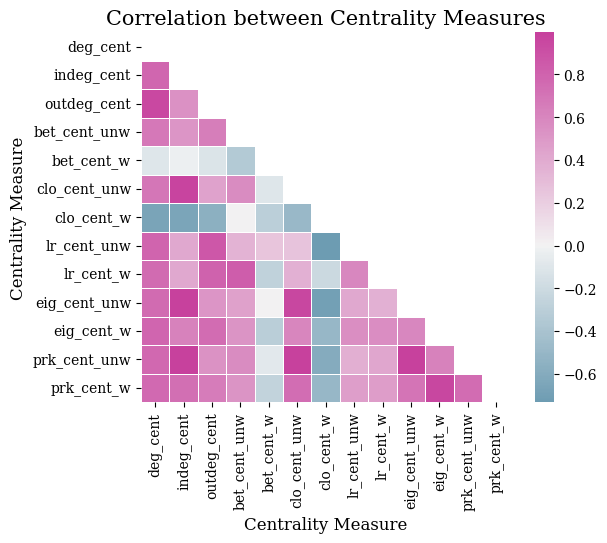

In [85]:
corr = cent.drop('party', axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 330, as_cmap=True)
sns.heatmap(corr, mask=mask, 
            #cmap=sns.cubehelix_palette(as_cmap=True), 
            cmap = cmap,
            linewidth=.5, center=0, square=True)

plt.title("Correlation between Centrality Measures", size=15, color='black', family = 'serif')
plt.ylabel("Centrality Measure", size=12, color='black', family = 'serif')
plt.xlabel("Centrality Measure", size=12, color='black', family = 'serif')

fig.tight_layout()

plt.savefig("/Users/rafiazkahilman/Documents/Workshop/SICSS 2024/network/figures/ss_corr.png", dpi=300)

In [98]:
node_attr2 = pd.merge(nodelist, cent, on='party')
node_attr2 = node_attr2.set_index('party').to_dict('index')
nx.set_node_attributes(G_sponsor, values=node_attr2)

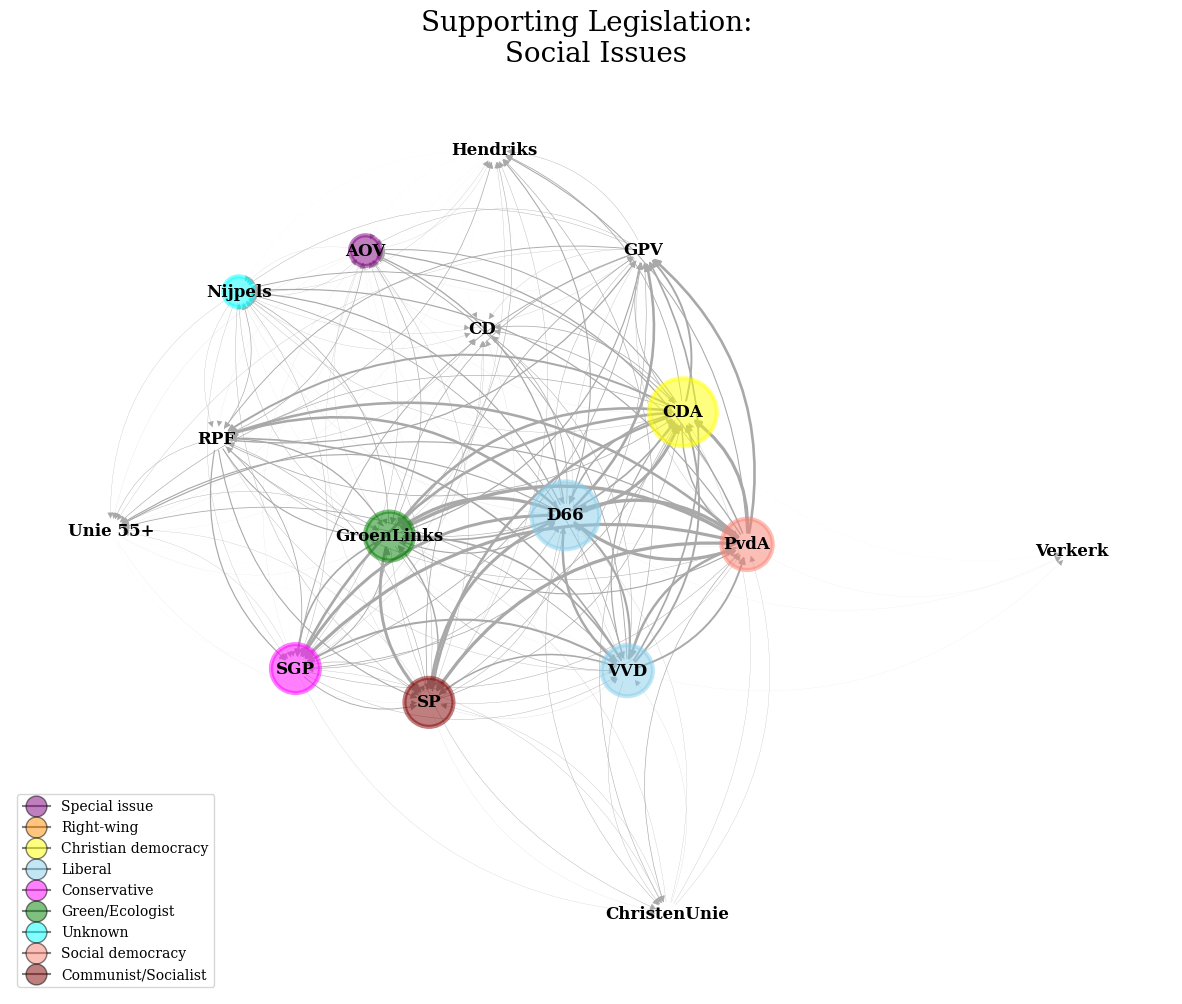

In [106]:
#node size: unweighted betweenness centrality
fig, ax = plt.subplots(figsize = (15, 12))

nx.draw_networkx_nodes(G = G_sponsor, 
                       pos = pos, 
                       node_color = [G.nodes[n]['color'] for n in G.nodes],
                       cmap=plt.cm.Set2,
                       #edgecolors = 'maroon', 
                       linewidths = 3,
                       node_size = [G.nodes[n]['bet_cent_unw']*80000 for n in G.nodes],
                       alpha=0.5, 
                       ax=ax)

nx.draw_networkx_edges(G = G_sponsor, 
                       pos = pos, 
                       width = [G.edges[n]['freq']/80 for n in G.edges], 
                       edge_color='darkgrey',
                       connectionstyle="arc3,rad=0.3" ,
                       alpha=1, 
                       arrows = True, 
                       arrowsize=10, 
                       ax=ax)

nx.draw_networkx_labels(G = G_sponsor, 
                        pos = pos,
                        font_family = 'serif', 
                        font_weight = 'bold',
                        font_color = "black")
#legend: ideology
legend_elements = [
    Line2D([0], [0], marker='o', color='black', label='Special issue', markerfacecolor='purple', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Right-wing', markerfacecolor='darkorange', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Christian democracy', markerfacecolor='yellow', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Liberal', markerfacecolor='skyblue', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Conservative', markerfacecolor='magenta', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Green/Ecologist', markerfacecolor='green', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Unknown', markerfacecolor='cyan', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Social democracy', markerfacecolor='salmon', 
           markersize=15, alpha=0.5),
    Line2D([0], [0], marker='o', color='black', label='Communist/Socialist', markerfacecolor='maroon', 
           markersize=15, alpha=0.5)]
plt.legend(handles=legend_elements, loc='lower left')

plt.title('Supporting Legislation: \n Social Issues', size=20, color='black', family = 'serif')
plt.axis('off')
    
    
plt.savefig("/Users/rafiazkahilman/Documents/Workshop/SICSS 2024/network/figures/ss_support.png", dpi=300)

In [107]:
cent_df = pd.melt(cent, id_vars='party', value_vars=cent.columns)
cent_df.columns = ['Party', 'Centrality Measure', 'Centrality']
cent_df.head(1)

Party Centrality Measure  Centrality
0   AOV           deg_cent    1.666667

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


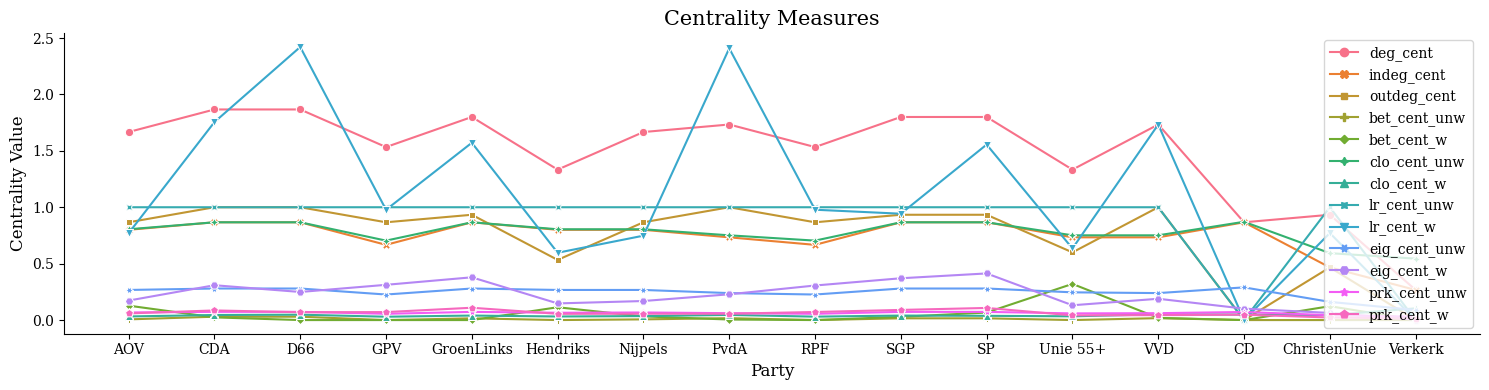

In [108]:
fig, ax = plt.subplots(figsize = (15, 4))

sns.lineplot(
    data=cent_df,
    x="Party", y="Centrality", hue="Centrality Measure", style="Centrality Measure",
    markers=True, dashes=False
)

plt.title("Centrality Measures", size=15, color='black', family = 'serif')
plt.ylabel("Centrality Value", size=12, color='black', family = 'serif')
plt.xlabel("Party", size=12, color='black', family = 'serif')

fig.tight_layout()
sns.despine()

plt.legend(loc='upper right')

plt.savefig("/Users/rafiazkahilman/Documents/Workshop/SICSS 2024/network/figures/ss_cent.png", dpi=300)

### Node Rank Metrics

#### VoteRank

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.voterank.html#networkx.algorithms.centrality.voterank

Rank a list of influential nodes in graph $G$ based on a voting scheme. 
- Step 1: all nodes vote for each of its in-neighbors
- Step 2: the node with the highest votes is elected iteratively

For directed graph, the voting scheme is as follows:
- Step 1: nodes only vote for their in-neighbors
- Step 2: only the voting ability of elected node and its out-neighbors are updated

In [109]:
ss_vote = pd.DataFrame(nx.voterank(G_sponsor))
ss_vote['rank'] = ss_vote.index+1
ss_vote.columns = ['party', 'rank']
ss_vote

party  rank
0          CDA     1
1          D66     2
2         PvdA     3
3          VVD     4
4   GroenLinks     5
5          SGP     6
6           SP     7
7          AOV     8
8          GPV     9
9      Nijpels    10
10         RPF    11
11    Unie 55+    12

### Node Clustering Metrics

#### Node/Local Clustering 

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering

It shows the connectedness of network around a particular node, providing an insight regarding to the extent of clustering tendency of a node.

For directed network, clustering could be measured by taking the fraction of all possible directed triangles or geometric average of the subgraph edge weights. 
<center> $c_u = \frac{T(u)}{2(deg^{tot}(u)(deg^{tot}(u)-1) - 2deg^{\leftrightarrow}(u))}$ </center>

where $T(u)$ is the number of directed triangles through node $u$, $deg^{tot}(u)$ is the summation over in-degree and out-degree of $u$ and $deg^{<->}(u)$ is the reciprocal degree of $u$ (the number of edges pointing in both directions).

In [110]:
ss_clust_unw = pd.DataFrame(nx.clustering(G_sponsor).keys())
ss_clust_unw['cc_unw'] = nx.clustering(G_sponsor).values()
ss_clust_unw.columns = ['party', 'cc_unw']
ss_clust_unw = ss_clust_unw.sort_values('cc_unw', ascending=False).reset_index(drop=True)
ss_clust_unw.head(1)

party  cc_unw
0  ChristenUnie     1.0

In [111]:
ss_clust_w = pd.DataFrame(nx.clustering(G_sponsor).keys())
ss_clust_w['cc_w'] = nx.clustering(G_sponsor).values()
ss_clust_w.columns = ['party', 'cc_w']
ss_clust_w = ss_clust_w.sort_values('cc_w', ascending=False).reset_index(drop=True)
ss_clust_w.head(1)

party  cc_w
0  ChristenUnie   1.0

### Node Reciprocity Metrics

#### Local Reciprocity

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.reciprocity.reciprocity.html

In a directed network, reciprocity of a single node $u$ is defined as the ratio of the number of edges pointing in both directions to the total number of edges connected to node $u$,
<center> $r_u = |\frac {{(u,v) |(v,u) }|} {|{(u,v) }|}$ </center> 

where $v$ are nodes connected to node $u$.

In [112]:
val = []
for i in list(G_sponsor.nodes()):
    y = nx.reciprocity(G_sponsor, i)
    val.append(y)
    
loc_rec = pd.DataFrame(list(G_sponsor.nodes()))
loc_rec['loc_rec'] = val
loc_rec.columns = ['party', 'loc_rec']
loc_rec.head(1)

party  loc_rec
0   AOV     0.96

<div class="alert alert-info">
  <strong>References</strong>
</div>

**More on the full data access:**
- Louwerse, Tom, Simon Otjes, and Cynthia van Vonno. (2017). Dutch Parliamentary Vote Dataset. Acta Politica, doi:10.1057/s41269-017-0042-4 

**More on the cabinet:** 
- https://nl.wikipedia.org/wiki/Kabinet-Kok_I 
- https://nl.wikipedia.org/wiki/Kabinet-Kok_II 

**More on the voting behavior:**
- Poole, K., & Rosenthal, H. (1985). A Spatial Model for Legislative Roll Call Analysis. American Journal of Political Science, 29(2), 357-384. doi:10.2307/2111172

**More on the network analysis:**
- Borgatti, S.P, Everett, M.G., Johnson, J.C., and Agneessens, F. (2024). Analyzing Social Networks. London: SAGE Publications.
- Newman, M.E.J. (2007). Networks: An Introduction. Oxford, UK: Oxford University Press.
- Pósfai, M., and Barabási, A. L. (2016). Network science. Cambridge, UK:: Cambridge University Press.
- Scott, J.P. (2017). Social Network Analysis: A Handbook. London: SAGE Publications. 